<a href="https://colab.research.google.com/github/maazansariX/maazansariX/blob/main/Python_Case_Study_Business_Case_of_Netflix_Analysis_%26_Insights_by_Maaz_Ansari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUSINESS CASE: **NETFLIX**
PROJECT & INSIGHTS ON PYTHON BY: **MAAZ ANSARI**


**About NETFLIX**\
Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.


**Business Problem by Scaler & Solution by Maaz Ansari**\
Analyse the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.



Dataset_link -> https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

## **Schema of Data:**

* **Show_id**     : Unique ID for every Movie / TV Show
* **Type**		    : Identifier - A Movie or TV Show
* **Title**		    : Title of the Movie / Tv Show
* **Director**	  : Director of the Movie
* **Cast**	      : Actors involved in the movie/show
* **Country**	    : Country where the movie/show was produced
* **Date_added**	: Date it was added on Netflix
* **Release_year**: Actual Release year of the movie/show
* **Rating**	  	: TV Rating of the movie/show
* **Duration**	  : Total Duration - in minutes or number of seasons
* **Listed_in**	  : Genre
* **Description** : The summary description

**Hints**

1. The exploration should have a goal. As you explore the data, keep in mind that you want to answer which type of shows to produce and how to grow the business.
2. Ensure each recommendation is backed by data. The company is looking for data-driven insights, not personal opinions or anecdotes.
3. Assume that you are presenting your findings to business executives who have only a basic understanding of data science. Avoid unnecessary technical jargon.
4. Start by exploring a few questions: What type of content is available in different countries?
    * How has the number of movies released per year changed over the last 20-30 years?
    * Comparison of tv shows vs. movies.
    * What is the best time to launch a TV show?
    * Analysis of actors/directors of different types of shows/movies.
    * Does Netflix has more focus on TV Shows than movies in recent years.
    * Understanding what content is available in different countries.








In [ ]:
"Step1: Importing Python Libraries Netflix Business Case"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
"Step 2: Upload of Netflix Data - Provided by Scaler"

In [2]:
from google.colab import files
uploaded = files.upload()

Saving netflix.csv to netflix.csv


In [ ]:
"Step 3: Read Netflix data"

In [3]:
netflix = pd.read_csv("netflix.csv")

In [ ]:
"Step 4: Review Header Data to check Upload and Read success"

In [4]:
netflix.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
#Raw Data Insights: Netflix data has 12 columns detailing about Netflix footprint

In [ ]:
"Step 5: Analyze the amount of Numerical Data from the given dataset"

In [5]:
netflix.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [ ]:
#Describe function is used to check on Numerical values which is not exactly numbers but Date in Numerical format.

In [ ]:
"Step 6: Understand the depth of data into Rows,Columns"

In [6]:
netflix.shape

(8807, 12)

In [ ]:
#As per above tuple, it is clear that Total no. of Rows is spread across 8807 Row items and 12 Columns

In [ ]:
"Step 7: To understhand the data type of each column to clean, modify and analyze"

In [7]:
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
# Except for release_year, all columns are predefined as objects, in that context we may need to do conversion and segregation as below
# 1. Modify Date column from Integer to Date format if we need to analyze by date, month or year or may be Weekday
# 2. Segregate columns like cast, director, listed_in(genres) and any other columns if required.
# 3. Clean-up columns like director, cast, country and any other columns if required.

In [ ]:
"Step 8: To understhand the data type of each column to clean, modify and analyze"

In [8]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Above insight is quite useful to check Non-Null values along with data type.

## **RAW DATA EXPLORATION AND SEGREGATION FOR REVIEW AND ANALYSIS**

In [ ]:
"Macro Analysis 1: For Columns in Netflix Data"
'Calculate Unique Values of "Column:show_id"'

In [9]:
netflix_show_id_count = netflix["show_id"].value_counts()
netflix_show_id_count

s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: show_id, Length: 8807, dtype: int64

In [ ]:
'Sanity Check: To analyze if "Column:show_id" has duplicates - Validation of entire column in terms of series'

In [11]:
netflix_show_id_count.nunique()

1

In [ ]:
#Hence, show_id(s) are unique and matches the no. of total rows available in the dataset, which means this is unique / primary identifier

In [ ]:
"Macro Analysis 2: For Columns in Netflix Data"
'Calculate Unique Values of "Column:type" to distinguish between unique values'

In [13]:
netflix_type_count = netflix["type"].value_counts()
netflix_type_count

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
# Distinction of Movies & TV Shows, above section gives you total no. of Movies & TV Shows which clearly outlines that
# 'MOVIES' are highly produced as compared to 'TV Shows'

In [ ]:
"Macro Analysis 3: For Columns in Netflix Data"
'Calculate Unique Values of "Column:title" to distinguish between unique values'

In [14]:
netflix_title_count = netflix["title"].value_counts()
netflix_title_count

Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: title, Length: 8807, dtype: int64

In [15]:
netflix_title_count.nunique()

1

In [ ]:
#Hence, title(s) are unique and matches the no. of total rows in line with show_id, but as per data type this can mostly be unique.

In [ ]:
"Macro Analysis 4: For Columns in Netflix Data"
'Columns like director, cast, country & listed_in can be explored in later stages once we split the values in one cell to multiple values'


In [ ]:
"Macro Analysis 5: For Columns in Netflix Data"
'Calculate Unique Values of "Column:date_added" to distinguish between unique values'

In [17]:
netflix_date_added_count = netflix["date_added"].value_counts()
netflix_date_added_count

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1767, dtype: int64

In [ ]:
#From above data in terms of count, maximum content was added in 2020 so this would be peak date for new content.
#To perform further analysis by Year & Month with distinction of YoY vs. Mom, we need to modify datatype of date_added column to Date

In [ ]:
"Macro Analysis 6: For Columns in Netflix Data"
'Calculate Unique Values of "Column:release_year" to distinguish between unique values'

In [18]:
netflix_release_year_count = netflix["release_year"].value_counts()
netflix_release_year_count

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [ ]:
#From above data in terms of count, maximum no. of new release happened in year 2018 followed by 2017.
#To further deep dive and segregate the outcome, we will revisit this data to find out Top 10 & Bottom 10 years of new releases.

In [ ]:
"Macro Analysis 7: For Columns in Netflix Data"
'Calculate Unique Values of "Column:rating" to distinguish between unique values'

In [19]:
netflix_rating_count = netflix["rating"].value_counts()
netflix_rating_count

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
#From above data in terms of count, maximum no. of ratings are accumulated at the level of TV-MA followed by TV-14

In [ ]:
"Macro Analysis 8: For Columns in Netflix Data"
'Calculate Unique Values of "Column:duration" to distinguish between unique values'

In [20]:
netflix_duration_count = netflix["duration"].value_counts()
netflix_duration_count

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [ ]:
#From above data in terms of count, maximum no. of duration is accumulated by season of 1 episode at the highest point.
#But above data doesn't give complete picture about segregation of Movies & TV Shows to give meaningful insight on the content by duration

# **HANDLING MISSING VALUES**

# REVIEW OF Null, NaN, Error values in Columns

In [ ]:
"Macro Analysis 9: Column wise review of Null, NaN & Error Values - Sanity Check"
'dataframe review: Netflix'

In [22]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [23]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#From above check, it clearly signifies that the data has Null, NaN or Error Values in Columns like
# 1. director
# 2. cast
# 3. country
# 4. date_added
# 5. rating
# 6. duration

In [ ]:
#Approach for above issue can be resolved in several ways based on the requirement, for the data to be unbiased - I would recommend
# 1. Replace Null, NaN & Error values with "No Data" in columns like director, cast, country & listed_in
# 2. For country,to maintain consistency we can repeat value into Top3 most appearing country doing EDA
# 3. For columns like date_added, rating & duration dropping the rows can be one option but to retain data, best is align as per top-value.

In [24]:
netflix.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
"Macro Analysis 11: Replace Missing values"
'1. Column: director'
'2. Column: cast'

In [25]:
'1. Column: director'
netflix['director'].replace(np.nan,'No Data', inplace = True)

In [26]:
'2. Column: cast'
netflix['cast'].replace(np.nan,'No Data', inplace = True)

In [27]:
netflix.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          No Data   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          No Data   
4      s5  TV Show           Kota Factory          No Data   

                                                cast        country  \
0                                            No Data  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                            No Data            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
#By doing this, it is easy to analyze NaN values with untagged data which tells us that there are huge data quality gaps in both
#1. director
#2. cast

In [ ]:
"Macro Analysis 11: Data transformation, split of multiple values by creating additional rows with segregated values"
'1. Column: director'
'2. Column: cast'
'3. Column: country'
'4. Column: listed_in'

In [28]:
'1. Column: director'

'Approach 1'
'''
netflix['director'] = netflix['director'].apply(lambda x: str(x).split(","))
netflix.explode('director')
'''

'Approach 2'
netflix_director = netflix['director'].str.split(',', expand=True).stack()
netflix_director = netflix_director.reset_index(level=1, drop=True).to_frame('director')
netflix_director['show_id'] = netflix['show_id']
netflix_director['type'] = netflix['type']

In [29]:
netflix_director

director show_id     type
0     Kirsten Johnson      s1    Movie
1             No Data      s2  TV Show
2     Julien Leclercq      s3  TV Show
3             No Data      s4  TV Show
4             No Data      s5  TV Show
...               ...     ...      ...
8802    David Fincher   s8803    Movie
8803          No Data   s8804  TV Show
8804  Ruben Fleischer   s8805    Movie
8805     Peter Hewitt   s8806    Movie
8806      Mozez Singh   s8807    Movie

[9612 rows x 3 columns]

In [ ]:
#Based on the split now we have distinct data segregated by director, hence we can do custom analysis

In [30]:
'2. Column: cast'

'Approach 2'
netflix_cast = netflix['cast'].str.split(',', expand=True).stack()
netflix_cast = netflix_cast.reset_index(level=1, drop=True).to_frame('cast')
netflix_cast['show_id'] = netflix['show_id']
netflix_cast['type'] = netflix['type']

In [31]:
netflix_cast

cast show_id     type
0                    No Data      s1    Movie
1                 Ama Qamata      s2  TV Show
1                Khosi Ngema      s2  TV Show
1              Gail Mabalane      s2  TV Show
1             Thabang Molaba      s2  TV Show
...                      ...     ...      ...
8806        Manish Chaudhary   s8807    Movie
8806            Meghna Malik   s8807    Movie
8806           Malkeet Rauni   s8807    Movie
8806          Anita Shabdish   s8807    Movie
8806   Chittaranjan Tripathy   s8807    Movie

[64951 rows x 3 columns]

In [ ]:
#Based on the split now we have distinct data segregated by cast, hence we can do custom analysis

In [32]:
'3. Column: country'

'Approach 2'
netflix_country = netflix['country'].str.split(',', expand=True).stack()
netflix_country = netflix_country.reset_index(level=1, drop=True).to_frame('country')
netflix_country['show_id'] = netflix['show_id']
netflix_country['type'] = netflix['type']

In [90]:
netflix_country

country show_id     type
0     United States      s1    Movie
1      South Africa      s2  TV Show
4             India      s5  TV Show
7     United States      s8    Movie
7             Ghana      s8    Movie
...             ...     ...      ...
8801         Jordan   s8802    Movie
8802  United States   s8803    Movie
8804  United States   s8805    Movie
8805  United States   s8806    Movie
8806          India   s8807    Movie

[10019 rows x 3 columns]

In [ ]:
#Based on the split now we have distinct data segregated by country, hence we can do custom analysis

In [34]:
'3. Column: listed_in'

'Approach 2'
netflix_listed_in = netflix['listed_in'].str.split(',', expand=True).stack()
netflix_listed_in = netflix_listed_in.reset_index(level=1, drop=True).to_frame('listed_in')
netflix_listed_in['show_id'] = netflix['show_id']
netflix_listed_in['type'] = netflix['type']

In [35]:
netflix_listed_in

listed_in show_id     type
0                Documentaries      s1    Movie
1       International TV Shows      s2  TV Show
1                    TV Dramas      s2  TV Show
1                 TV Mysteries      s2  TV Show
2               Crime TV Shows      s3  TV Show
...                        ...     ...      ...
8805  Children & Family Movies   s8806    Movie
8805                  Comedies   s8806    Movie
8806                    Dramas   s8807    Movie
8806      International Movies   s8807    Movie
8806          Music & Musicals   s8807    Movie

[19323 rows x 3 columns]

In [ ]:
#Based on the split now we have distinct data segregated by listed_in, hence we can do custom analysis

In [ ]:
"Macro Analysis 12: Replacing values in rating & duration"
'1. rating - replace NaN with mode[0] i.e. most repeated value'
'2. duration - replace Nan with mode[0] i.e. most repeated value'
'3. duration - replace Nan with mode[0] i.e. most repeated value'

In [36]:
'1. rating - replace NaN with mode[0] i.e. most repeated value'
'Finding mode by type'
movie_rating = netflix.loc[netflix['type'] == 'Movie', 'rating'].mode()[0]
tv_rating = netflix.loc[netflix['type'] == 'TV Show', 'rating'].mode()[0]

In [37]:
movie_rating

'TV-MA'

In [38]:
tv_rating

'TV-MA'

In [ ]:
'Replacing mode value above by content type'

In [41]:
netflix['rating'] = netflix.apply(lambda x: movie_rating if x['type'] == 'Movie' and pd.isna(x['rating'])
                                          else tv_rating if x['type'] == "TV Show" and pd.isna(x['rating'])
                                          else x['rating'], axis = 1
                                  )

In [42]:
netflix.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          No Data   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          No Data   
4      s5  TV Show           Kota Factory          No Data   

                                                cast        country  \
0                                            No Data  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                            No Data            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [43]:
'2. duration - replace Nan with mode[0] i.e. most repeated value'
movie_duration = netflix.loc[netflix['type'] == 'Movie', 'duration'].mode()[0]
tv_duration = netflix.loc[netflix['type'] == 'TV Show', 'duration'].mode()[0]

In [44]:
movie_duration

'90 min'

In [45]:
tv_duration

'1 Season'

In [46]:
netflix['duration'] = netflix.apply(lambda x: movie_duration if x['type'] == 'Movie' and pd.isna(x['duration'])
                                          else tv_duration if x['type'] == "TV Show" and pd.isna(x['duration'])
                                          else x['duration'], axis = 1
                                  )

In [47]:
netflix.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          No Data   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          No Data   
4      s5  TV Show           Kota Factory          No Data   

                                                cast        country  \
0                                            No Data  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                            No Data            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [48]:
netflix.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added       10
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [49]:
'3. duration - replace Nan with mode[0] i.e. most repeated value'
prominent_date = netflix['date_added'].mode()[0]
prominent_date

'January 1, 2020'

In [50]:
netflix['duration'] = netflix.apply(lambda x: prominent_date if pd.isna(x['date_added'])
                                                           else x['duration'], axis = 1
                                  )

In [51]:
netflix.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added       10
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
"Macro Analysis 13: Handing Date column and distribution of data by Date in Month & Year"
'Change Date from Integer to DateTime and Extract Date sections'

In [ ]:
'Change Date from Integer to DateTime'

In [52]:
netflix["date_added"] = pd.to_datetime(netflix['date_added'])

In [53]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:
#As per above info, it is clear that date_added column is now converted to Date format.

In [ ]:
'Extract Date sections'

In [54]:
netflix['month_added'] = netflix['date_added'].dt.month
month_added = netflix['month_added'].mode()[0]
netflix['month_added'] = netflix.apply(lambda x: month_added if pd.isna(x['month_added']) else x['month_added'], axis = 1)
netflix['month_added'] = netflix['month_added'].astype(int)

In [55]:
netflix['month_name_added'] = netflix['date_added'].dt.month_name()
month_name_added = netflix['month_name_added'].mode()[0]
netflix['month_name_added'] = netflix.apply(lambda x: month_added if pd.isna(x['month_name_added']) else x['month_name_added'], axis = 1)

In [56]:
netflix['year_added'] = netflix['date_added'].dt.year
year_added = netflix['year_added'].mode()[0]
netflix['year_added'] = netflix.apply(lambda x: month_added if pd.isna(x['year_added']) else x['year_added'], axis = 1)
netflix['year_added'] = netflix['year_added'].astype(int)

In [57]:
netflix['YYYY-MM'] = netflix['date_added'].dt.strftime('%Y-%m')

In [58]:
netflix.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          No Data   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          No Data   
4      s5  TV Show           Kota Factory          No Data   

                                                cast        country  \
0                                            No Data  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                            No Data            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  month_added  \
0  As her father nears the end of his life, filmm...            9   
1  After crossing paths at a party, a Cape Town t...            9   
2  To protect his family from a powerful drug lor...            9   
3  Feuds, flirtations and toilet talk go down amo...            9   
4  In a city of coaching centers known to train I...            9   

  month_name_added  year_added  YYYY-MM  
0        September        2021  2021-09  
1        September        2021  2021-09  
2        September        2021  2021-09  
3        September        2021  2021-09  
4        September        2021  2021-09

In [59]:
Remove_Error = netflix[netflix["year_added"] == 7].index
Remove_Error

Int64Index([6066, 6174, 6795, 6806, 6901, 7196, 7254, 7406, 7847, 8182], dtype='int64')

In [60]:
netflix.drop(Remove_Error, inplace = True)

In [ ]:
#Till this step, we have converted Column:date_added to Date Format and extend 3 columns as below -
#1. month_added
#2. month_name_added
#3. year_added

In [62]:
netflix.isna().sum()

show_id               0
type                  0
title                 0
director              0
cast                  0
country             830
date_added            0
release_year          0
rating                0
duration              0
listed_in             0
description           0
month_added           0
month_name_added      0
year_added            0
YYYY-MM               0
dtype: int64

In [ ]:
"Macro Analysis 14: Duplicacy check"

In [63]:
netflix.duplicated().sum()

0

In [ ]:
# No duplicates exists after clean-up, modification and data transformation. For columns - cast, director & country

In [64]:
netflix.shape

(8797, 16)

In [65]:
netflix.rename({'listed_in':"Genre"}, axis = 1, inplace = True)

In [66]:
netflix.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          No Data   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          No Data   
4      s5  TV Show           Kota Factory          No Data   

                                                cast        country  \
0                                            No Data  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                            No Data            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                               Genre  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  month_added  \
0  As her father nears the end of his life, filmm...            9   
1  After crossing paths at a party, a Cape Town t...            9   
2  To protect his family from a powerful drug lor...            9   
3  Feuds, flirtations and toilet talk go down amo...            9   
4  In a city of coaching centers known to train I...            9   

  month_name_added  year_added  YYYY-MM  
0        September        2021  2021-09  
1        September        2021  2021-09  
2        September        2021  2021-09  
3        September        2021  2021-09  
4        September        2021  2021-09

# **DATA INSIGHTS, DATA EXPLORATION & ANALYSIS**

# **1. CONTENT**


In [ ]:
"DATA ANALYSIS 1: PERCENTAGE DISTRIBUTION OF CONTENT TYPES"

In [67]:
a = netflix.groupby(['type'])['type'].count() #This reflects distribution of Content by count
a

type
Movie      6131
TV Show    2666
Name: type, dtype: int64

In [68]:
b = len(netflix)
b

8797

In [69]:
c = ((a/b)*100).round(2)
c

type
Movie      69.69
TV Show    30.31
Name: type, dtype: float64

In [ ]:
'Creating Dataframe based on Distribution of Movies & TV Shows'

In [70]:
Content_ratio = pd.DataFrame(c)
Content_ratio

type
type          
Movie    69.69
TV Show  30.31

In [72]:
Content_ratio.rename({'type':"%"}, axis = 1, inplace = True)

In [73]:
Content_ratio

%
type          
Movie    69.69
TV Show  30.31

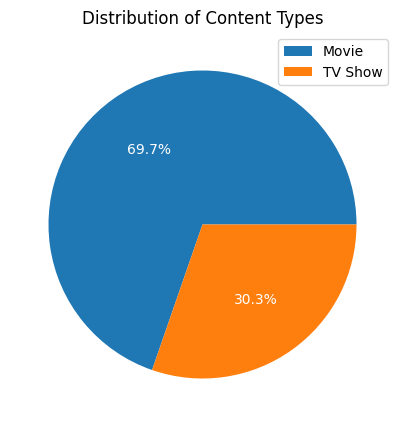

In [74]:
plt.figure(figsize = (10,5))
plt.pie(Content_ratio['%'],labels = Content_ratio.index, autopct='%1.1f%%', textprops={'color':'white'})
plt.title("Distribution of Content Types")
plt.legend(loc='best')
plt.show()

# 1. Insights about Distribution of Content
Netflix has majorly two content types, 70% of content is movies followed by remaining 30% of TV Shows. This also means producers focus more on producing movies as compared to TV Shows, given one-go watch.

# **2. COUNTRIES**

In [ ]:
"DATA ANALYSIS 1.1: Top 10 Countries where Netflix is Popular"

In [75]:
netflix_country

country show_id     type
0     United States      s1    Movie
1      South Africa      s2  TV Show
4             India      s5  TV Show
7     United States      s8    Movie
7             Ghana      s8    Movie
...             ...     ...      ...
8801         Jordan   s8802    Movie
8802  United States   s8803    Movie
8804  United States   s8805    Movie
8805  United States   s8806    Movie
8806          India   s8807    Movie

[10019 rows x 3 columns]

In [76]:
netflix_country['country'] = netflix_country['country'].str.strip() #To remove extra spaces or white invisibles, Value clean-up
netflix_country['country'] = netflix_country['country'].str.lstrip()
netflix_country['country'] = netflix_country['country'].str.rstrip()

In [77]:
netflix_country

country show_id     type
0     United States      s1    Movie
1      South Africa      s2  TV Show
4             India      s5  TV Show
7     United States      s8    Movie
7             Ghana      s8    Movie
...             ...     ...      ...
8801         Jordan   s8802    Movie
8802  United States   s8803    Movie
8804  United States   s8805    Movie
8805  United States   s8806    Movie
8806          India   s8807    Movie

[10019 rows x 3 columns]

In [78]:
country_count = netflix_country['country'].value_counts()

In [79]:
country_count

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: country, Length: 123, dtype: int64

In [80]:
top_10_countries = country_count.head(10)

In [81]:
top_10_countries

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: country, dtype: int64

In [82]:
top_10_countries.index

Index(['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan',
       'Spain', 'South Korea', 'Germany', 'Mexico'],
      dtype='object')

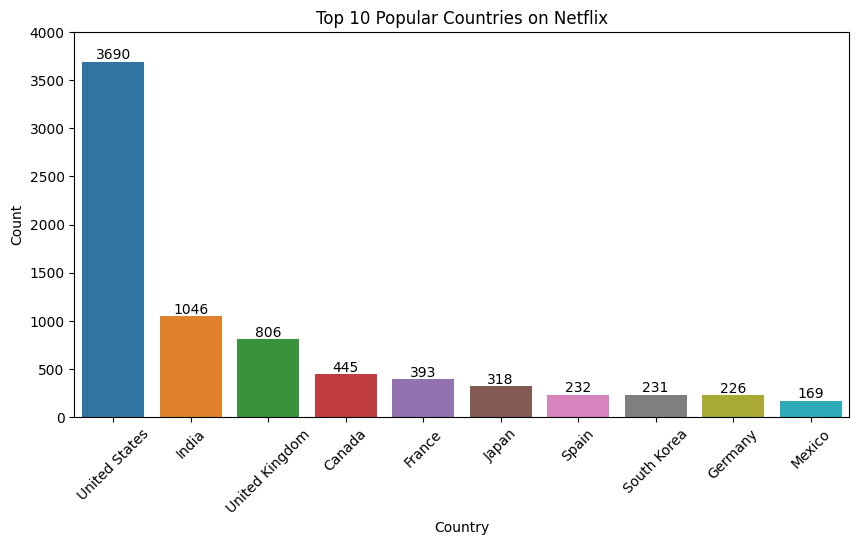

In [83]:
plt.figure(figsize = (10,5))
country_barplot = sns.barplot(x = top_10_countries.index, y = top_10_countries.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.ylim(0, 4000)
plt.xticks(rotation = 45)
plt.title("Top 10 Popular Countries on Netflix")
for index, value in enumerate(top_10_countries):
  country_barplot.text(index, value, int(value), ha = 'center', va = 'bottom')
'''
for p in country_barplot.patches:
    country_barplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
'''
plt.show()


# 1. Insights about Top 10 Countries Popular on Netflix

It is notable that Top 10 Countries have obvious names like United States which has the highest popularity and interesting to note that India follows the lead position on 2nd spot and UK at 3rd spot.

In [ ]:
"DATA ANALYSIS 1.2: Top 10 Countries where Netflix is Popular - Movies vs. TV Shows"

In [85]:
netflix_country_Top10 = netflix_country[netflix_country['country'].isin(['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan',
       'Spain', 'South Korea', 'Germany', 'Mexico'])]

In [86]:
netflix_country_Top10

country show_id     type
0      United States      s1    Movie
4              India      s5  TV Show
7      United States      s8    Movie
7     United Kingdom      s8    Movie
7            Germany      s8    Movie
...              ...     ...      ...
8799           India   s8800    Movie
8802   United States   s8803    Movie
8804   United States   s8805    Movie
8805   United States   s8806    Movie
8806           India   s8807    Movie

[7556 rows x 3 columns]

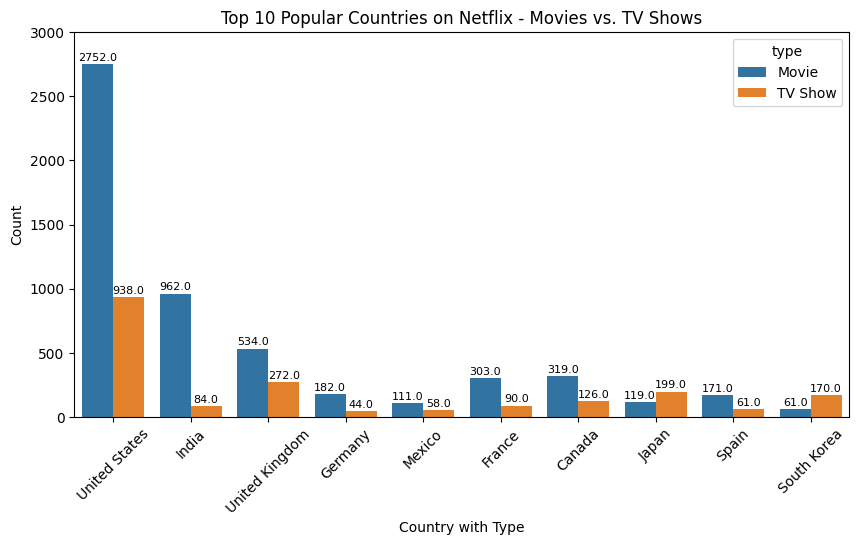

In [87]:
plt.figure(figsize = (10,5))
country_countplot = sns.countplot(x = netflix_country_Top10['country'], hue = netflix_country_Top10['type'])
plt.xlabel('Country with Type')
plt.ylabel('Count')
plt.ylim(0, 3000)
plt.xticks(rotation = 45)
plt.title("Top 10 Popular Countries on Netflix - Movies vs. TV Shows")

for p in country_countplot.patches:
    country_countplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                               ha='center', va='bottom', xytext=(0, 1), textcoords='offset points', fontsize = 8)

#2. Insights about Top 10 Popular Countries on Netflix - Movies vs. TV Shows

Based on the Top 10 Countries, if we analyze the popularity of countries by Movies & TV Shows then it tells us a different story for Top 10 Countries by Movies & Top 10 Countries by TV Shows. Hence, to get a clear picture, we need to draw individual graphs to identify Top 10 by each type of content.

In [ ]:
"DATA ANALYSIS 1.3: Top 10 Countries where Netflix is Popular - by Movies"

In [91]:
netflix_country_movie = netflix_country[netflix_country['type'] == 'Movie']
netflix_country_movie

country show_id   type
0      United States      s1  Movie
7      United States      s8  Movie
7              Ghana      s8  Movie
7       Burkina Faso      s8  Movie
7     United Kingdom      s8  Movie
...              ...     ...    ...
8801          Jordan   s8802  Movie
8802   United States   s8803  Movie
8804   United States   s8805  Movie
8805   United States   s8806  Movie
8806           India   s8807  Movie

[7379 rows x 3 columns]

In [92]:
country_count_movie = netflix_country_movie['country'].value_counts()
top_10_countries_by_movie = country_count_movie.head(10)

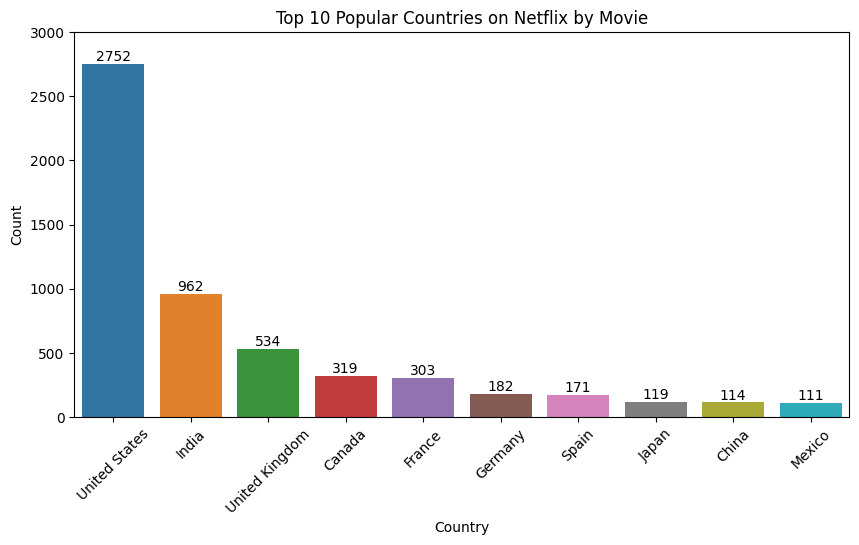

In [93]:
plt.figure(figsize = (10,5))
country_movie_barplot = sns.barplot(x = top_10_countries_by_movie.index, y = top_10_countries_by_movie.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.ylim(0, 3000)
plt.xticks(rotation = 45)
plt.title("Top 10 Popular Countries on Netflix by Movie")
for index, value in enumerate(top_10_countries_by_movie):
  country_movie_barplot.text(index, value, int(value), ha = 'center', va = 'bottom')
plt.show()

#3. Insights about Top 10 Popular Countries on Netflix by Movie

Netflix data above outlines that even if we filter by Top 10 countries by Movie content, United States still retains the top spot with India following the 2nd position. An easy representation can be shown by stacking Top 10 Countries with Top 10 Countries by type.

In [ ]:
"DATA ANALYSIS 1.4: Top 10 Countries where Netflix is Popular - by TV Shows"

In [95]:
netflix_country_TV_Show = netflix_country[netflix_country['type'] == "TV Show"]
netflix_country_TV_Show

country show_id     type
1       South Africa      s2  TV Show
4              India      s5  TV Show
8     United Kingdom      s9  TV Show
15     United States     s16  TV Show
17            Mexico     s18  TV Show
...              ...     ...      ...
8797   United States   s8798  TV Show
8797          France   s8798  TV Show
8797     South Korea   s8798  TV Show
8797       Indonesia   s8798  TV Show
8800        Pakistan   s8801  TV Show

[2640 rows x 3 columns]

In [96]:
country_count_TV_Show = netflix_country_TV_Show['country'].value_counts()
top_10_countries_by_TV_Show = country_count_TV_Show.head(10)

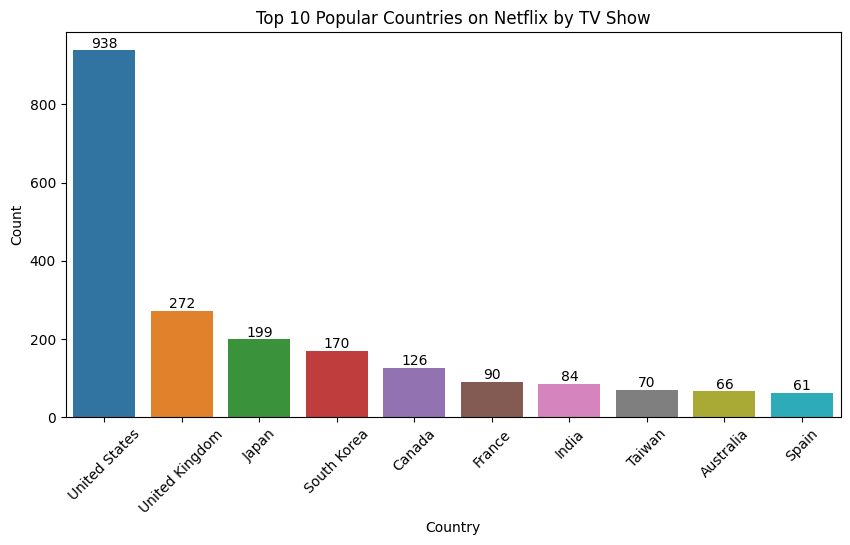

In [97]:
plt.figure(figsize = (10,5))
country_TV_Show_barplot = sns.barplot(x = top_10_countries_by_TV_Show.index, y = top_10_countries_by_TV_Show.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title("Top 10 Popular Countries on Netflix by TV Show")
for index, value in enumerate(top_10_countries_by_TV_Show):
  country_TV_Show_barplot.text(index, value, int(value), ha = 'center', va = 'bottom')
plt.show()

#4. Insights about Top 10 Popular Countries on Netflix by TV Show

Netflix data above outlines that if filtered by Top 10 countries by TV Show, United States still retains the top spot but United Kingdom moves upt the ranks settling at 2nd position. This also tells us that if we do filters by content globally, it differs for content produced by type i.e. Movies & TV Shows. An easy representation can be shown by stacking Top 10 Countries with Top 10 Countries by type.

In [ ]:
"DATA ANALYSIS 1.5: Top 10 Countries where Netflix is Popular - OVERVIEW"

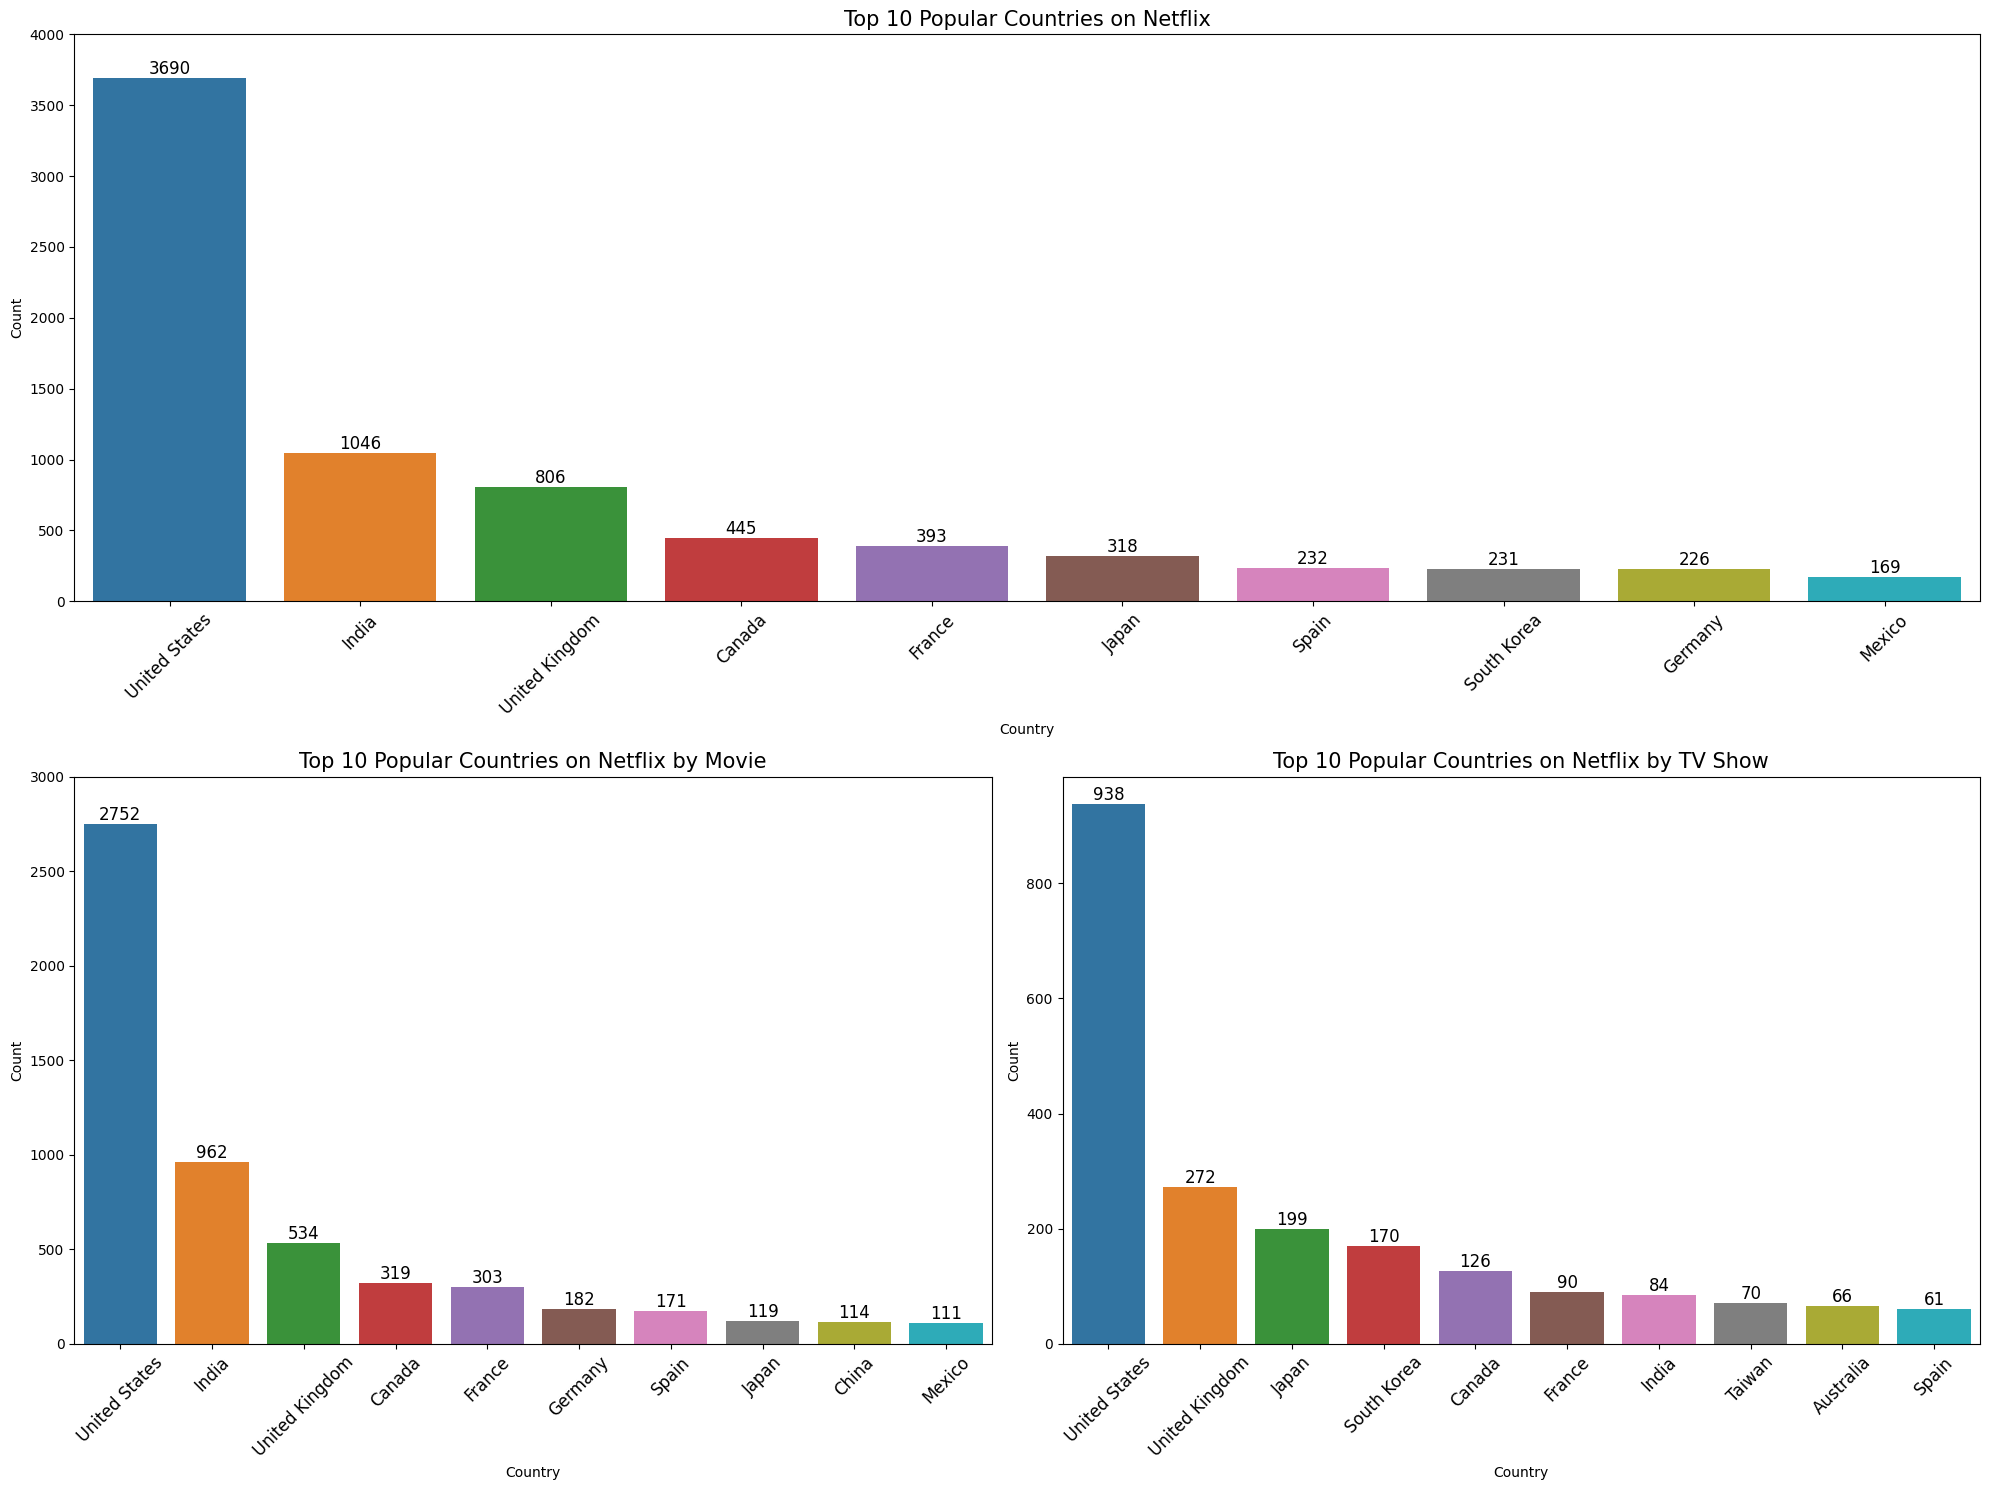

In [98]:
plt.figure(figsize = (20,15))

plt.subplot(2,1,1)
country_barplot = sns.barplot(x = top_10_countries.index, y = top_10_countries.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.ylim(0, 4000)
plt.xticks(rotation = 45,fontsize = 12)
plt.title("Top 10 Popular Countries on Netflix",fontsize = 15)

for index, value in enumerate(top_10_countries):
  country_barplot.text(index, value, int(value), ha = 'center', va = 'bottom',fontsize = 12)

plt.subplot(2,2,3)
country_movie_barplot = sns.barplot(x = top_10_countries_by_movie.index, y = top_10_countries_by_movie.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.ylim(0, 3000)
plt.xticks(rotation = 45,fontsize = 12)
plt.title("Top 10 Popular Countries on Netflix by Movie",fontsize = 15)

for index, value in enumerate(top_10_countries_by_movie):
  country_movie_barplot.text(index, value, int(value), ha = 'center', va = 'bottom',fontsize = 12)

plt.subplot(2,2,4)
country_TV_Show_barplot = sns.barplot(x = top_10_countries_by_TV_Show.index, y = top_10_countries_by_TV_Show.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation = 45,fontsize = 12)
plt.title("Top 10 Popular Countries on Netflix by TV Show",fontsize = 15)
for index, value in enumerate(top_10_countries_by_TV_Show):
  country_TV_Show_barplot.text(index, value, int(value), ha = 'center', va = 'bottom',fontsize = 12)

plt.tight_layout() #Used to avoid overlapping of LABELS from above subplots

#5. OVERVIEW - Insights about Top 10 Popular Countries on Netflix

Netflix data clearly outlines that Top 10 Countries has a unique undisputed leader i.e. United States where most of the Netflix content is based. If we try to analyze Top 10 Countries by Movies or TV Shows, even then 1st spot is retained by United States, however, subsequent ranks changes when we filter by Movies where India take 2nd Spot, whereas in case of TV Shows, 2nd spot is captured by United Kingdom.

# **3. ACTORS**

In [ ]:
"DATA ANALYSIS 2: TOP 10 ACTORS BY MOVIES / TV SHOWS COUNT"

In [99]:
netflix_cast

cast show_id     type
0                    No Data      s1    Movie
1                 Ama Qamata      s2  TV Show
1                Khosi Ngema      s2  TV Show
1              Gail Mabalane      s2  TV Show
1             Thabang Molaba      s2  TV Show
...                      ...     ...      ...
8806        Manish Chaudhary   s8807    Movie
8806            Meghna Malik   s8807    Movie
8806           Malkeet Rauni   s8807    Movie
8806          Anita Shabdish   s8807    Movie
8806   Chittaranjan Tripathy   s8807    Movie

[64951 rows x 3 columns]

In [100]:
cast_count = netflix_cast['cast'].value_counts()[1:]

In [101]:
cast_count

 Anupam Kher              39
 Rupa Bhimani             31
 Takahiro Sakurai         30
 Julie Tejwani            28
 Om Puri                  27
                          ..
 Vedika                    1
 Tedros Teclebrhan         1
 Maryam Zaree              1
 Melanie Straub            1
 Chittaranjan Tripathy     1
Name: cast, Length: 39296, dtype: int64

In [102]:
top_10_cast = cast_count.head(10)

In [103]:
top_10_cast

 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
Shah Rukh Khan       26
 Rajesh Kava         26
 Andrea Libman       25
 Paresh Rawal        25
 Boman Irani         25
Name: cast, dtype: int64

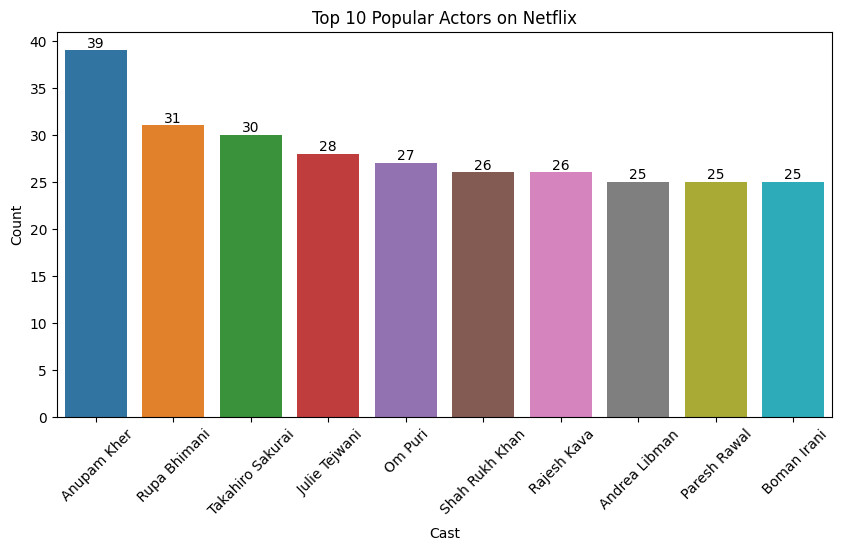

In [104]:
plt.figure(figsize = (10,5))
cast_barplot = sns.barplot(x = top_10_cast.index, y = top_10_cast.values)
plt.xlabel('Cast')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title("Top 10 Popular Actors on Netflix")
for index, value in enumerate(top_10_cast):
  cast_barplot.text(index, value, int(value), ha = 'center', va = 'bottom')
plt.show()

# 1. Insights about Top 10 Actors Popular on Netflix

Netflix data shows interestingly one of the acclaimed Indian Actors in Top of the list - Mr. Anupam Kher and Shahrukh Khan ranks even behind actor like Om Puri who is 5th Spot with Sharukh Khan being on 6th position.

In [ ]:
"DATA ANALYSIS 2.1: TOP 10 ACTORS BY MOVIES / TV SHOWS COUNT"

In [105]:
netflix_cast

cast show_id     type
0                    No Data      s1    Movie
1                 Ama Qamata      s2  TV Show
1                Khosi Ngema      s2  TV Show
1              Gail Mabalane      s2  TV Show
1             Thabang Molaba      s2  TV Show
...                      ...     ...      ...
8806        Manish Chaudhary   s8807    Movie
8806            Meghna Malik   s8807    Movie
8806           Malkeet Rauni   s8807    Movie
8806          Anita Shabdish   s8807    Movie
8806   Chittaranjan Tripathy   s8807    Movie

[64951 rows x 3 columns]

In [106]:
netflix_cast['cast'] = netflix_cast['cast'].str.strip() #To remove extra spaces or white invisibles, Value clean-up
netflix_cast['cast'] = netflix_cast['cast'].str.lstrip()
netflix_cast['cast'] = netflix_cast['cast'].str.rstrip()

In [ ]:
"DATA ANALYSIS 2.1.1: TOP 10 ACTORS BY MOVIES"

In [107]:
netflix_cast_movie = netflix_cast[netflix_cast["type"] == "Movie"]
netflix_cast_movie

cast show_id   type
0                   No Data      s1  Movie
6           Vanessa Hudgens      s7  Movie
6              Kimiko Glenn      s7  Movie
6             James Marsden      s7  Movie
6              Sofia Carson      s7  Movie
...                     ...     ...    ...
8806       Manish Chaudhary   s8807  Movie
8806           Meghna Malik   s8807  Movie
8806          Malkeet Rauni   s8807  Movie
8806         Anita Shabdish   s8807  Movie
8806  Chittaranjan Tripathy   s8807  Movie

[44950 rows x 3 columns]

In [108]:
cast_count_movie = netflix_cast_movie['cast'].value_counts()[1:]
top_10_cast_by_movie = cast_count_movie.head(10)
top_10_cast_by_movie

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Om Puri             30
Akshay Kumar        30
Paresh Rawal        28
Julie Tejwani       28
Amitabh Bachchan    28
Rupa Bhimani        27
Boman Irani         27
Name: cast, dtype: int64

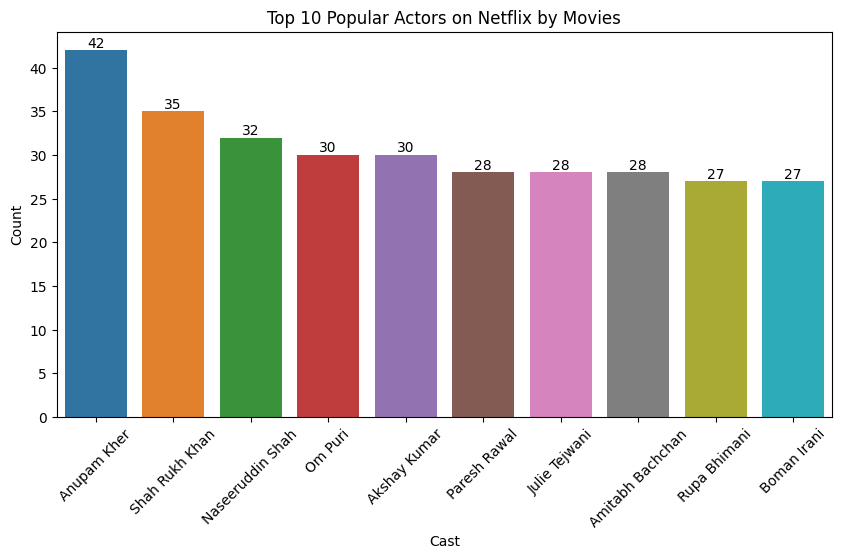

In [109]:
plt.figure(figsize = (10,5))
cast_movie_barplot = sns.barplot(x = top_10_cast_by_movie.index, y = top_10_cast_by_movie.values)
plt.xlabel('Cast')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title("Top 10 Popular Actors on Netflix by Movies")
for index, value in enumerate(top_10_cast_by_movie):
  cast_movie_barplot.text(index, value, int(value), ha = 'center', va = 'bottom')
plt.show()

#2. Insights about Top 10 Actors Popular on Netflix by Movies

Netflix data shows that most of the Top 10 Actors are from Bollywood with Anupam Kher topping the list with 1st position, followed by Rupa Bhimani in 2nd Spot and Om Puri and Shah Rukh Khan in 3rd and 4th Spot respectively. Top 10 actors by Movie seems to be largely concentrated by Indian Actors so content should be produced more by Bollywood or Indian cinema to maintain dominance.

In [ ]:
"DATA ANALYSIS 2.1.1: TOP 10 ACTORS BY TV SHOWS"

In [110]:
netflix_cast_TV_Show = netflix_cast[netflix_cast["type"] == "TV Show"]
netflix_cast_TV_Show

cast show_id     type
1             Ama Qamata      s2  TV Show
1            Khosi Ngema      s2  TV Show
1          Gail Mabalane      s2  TV Show
1         Thabang Molaba      s2  TV Show
1       Dillon Windvogel      s2  TV Show
...                  ...     ...      ...
8800     Samina Peerzada   s8801  TV Show
8800        Waseem Abbas   s8801  TV Show
8800        Javed Sheikh   s8801  TV Show
8800  Hina Khawaja Bayat   s8801  TV Show
8803             No Data   s8804  TV Show

[20001 rows x 3 columns]

In [111]:
cast_count_TV_Show = netflix_cast_TV_Show['cast'].value_counts()[1:]
top_10_cast_TV_Show = cast_count_TV_Show.head(10)
top_10_cast_TV_Show

Takahiro Sakurai       25
Yuki Kaji              19
Daisuke Ono            17
Junichi Suwabe         17
Ai Kayano              17
Yuichi Nakamura        16
Yoshimasa Hosoya       15
Jun Fukuyama           15
David Attenborough     14
Yoshitsugu Matsuoka    13
Name: cast, dtype: int64

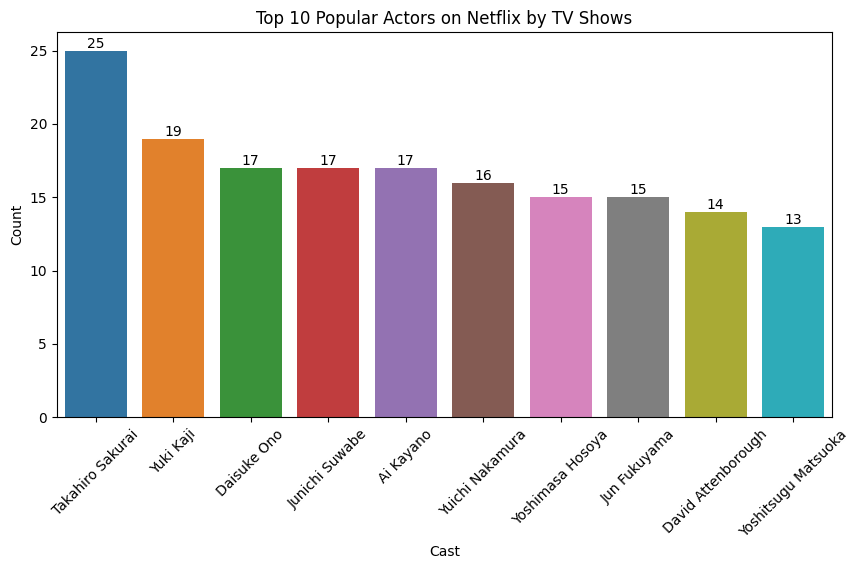

In [112]:
plt.figure(figsize = (10,5))
cast_TV_Show_barplot = sns.barplot(x = top_10_cast_TV_Show.index, y = top_10_cast_TV_Show.values)
plt.xlabel('Cast')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title("Top 10 Popular Actors on Netflix by TV Shows")
for index, value in enumerate(top_10_cast_TV_Show):
  cast_TV_Show_barplot.text(index, value, int(value), ha = 'center', va = 'bottom')
plt.show()

#3. Insights about Top 10 Actors Popular on Netflix by TV Shows

Netflix data says that when we focus on TV Shows to recognize Top 10 Actors interestingly it is dominated by totally a new leagure of Actors like Takahiro Sakurai, Yuki Kaji and Ai Kayano in leading positions. Looking at the Top 10 actors for TV Shows, it reflects that Japan talent is more prominent in TV Shows with Takahiro Sakurai securing 1st position.

In [ ]:
"DATA ANALYSIS 2.2: TOP 10 ACTORS BY GENRES"

In [113]:
netflix_cast["Genre"] = netflix["Genre"]

In [114]:
netflix_cast

cast show_id     type  \
0                   No Data      s1    Movie   
1                Ama Qamata      s2  TV Show   
1               Khosi Ngema      s2  TV Show   
1             Gail Mabalane      s2  TV Show   
1            Thabang Molaba      s2  TV Show   
...                     ...     ...      ...   
8806       Manish Chaudhary   s8807    Movie   
8806           Meghna Malik   s8807    Movie   
8806          Malkeet Rauni   s8807    Movie   
8806         Anita Shabdish   s8807    Movie   
8806  Chittaranjan Tripathy   s8807    Movie   

                                                Genre  
0                                       Documentaries  
1     International TV Shows, TV Dramas, TV Mysteries  
1     International TV Shows, TV Dramas, TV Mysteries  
1     International TV Shows, TV Dramas, TV Mysteries  
1     International TV Shows, TV Dramas, TV Mysteries  
...                                               ...  
8806   Dramas, International Movies, Music & Musicals  
8806   Dramas, International Movies, Music & Musicals  
8806   Dramas, International Movies, Music & Musicals  
8806   Dramas, International Movies, Music & Musicals  
8806   Dramas, International Movies, Music & Musicals  

[64951 rows x 4 columns]

In [115]:
netflix_cast['Genre'] = netflix_cast['Genre'].apply(lambda x: str(x).split(","))
netflix_cast = netflix_cast.explode('Genre')

In [116]:
netflix_cast

cast show_id     type                   Genre
0                   No Data      s1    Movie           Documentaries
1                Ama Qamata      s2  TV Show  International TV Shows
1                Ama Qamata      s2  TV Show               TV Dramas
1                Ama Qamata      s2  TV Show            TV Mysteries
1               Khosi Ngema      s2  TV Show  International TV Shows
...                     ...     ...      ...                     ...
8806         Anita Shabdish   s8807    Movie    International Movies
8806         Anita Shabdish   s8807    Movie        Music & Musicals
8806  Chittaranjan Tripathy   s8807    Movie                  Dramas
8806  Chittaranjan Tripathy   s8807    Movie    International Movies
8806  Chittaranjan Tripathy   s8807    Movie        Music & Musicals

[149423 rows x 4 columns]

In [117]:
netflix_cast['Genre'] = netflix_cast['Genre'].str.strip() #To remove extra spaces or white invisibles, Value clean-up
netflix_cast['Genre'] = netflix_cast['Genre'].str.lstrip()
netflix_cast['Genre'] = netflix_cast['Genre'].str.rstrip()

In [118]:
netflix_cast['Genre'].nunique()

43

In [ ]:
#Further analysis is not meaningful to reflect as it would duplicate the outcome to overall Ranking by Top 10 Actors

#4. Insights about Top 10 Actors Popular on Netflix by Genres

For Netflix, this analysis will not make sense in terms of Top 10 as Genres when split into individual categories results into 42 unique items. Hence, we can do further analysis on Genre when we exclusively explore Genre (listed_in) column.

In [ ]:
"DATA ANALYSIS 2.3: Top 10 Actors on Netflix - OVERVIEW"

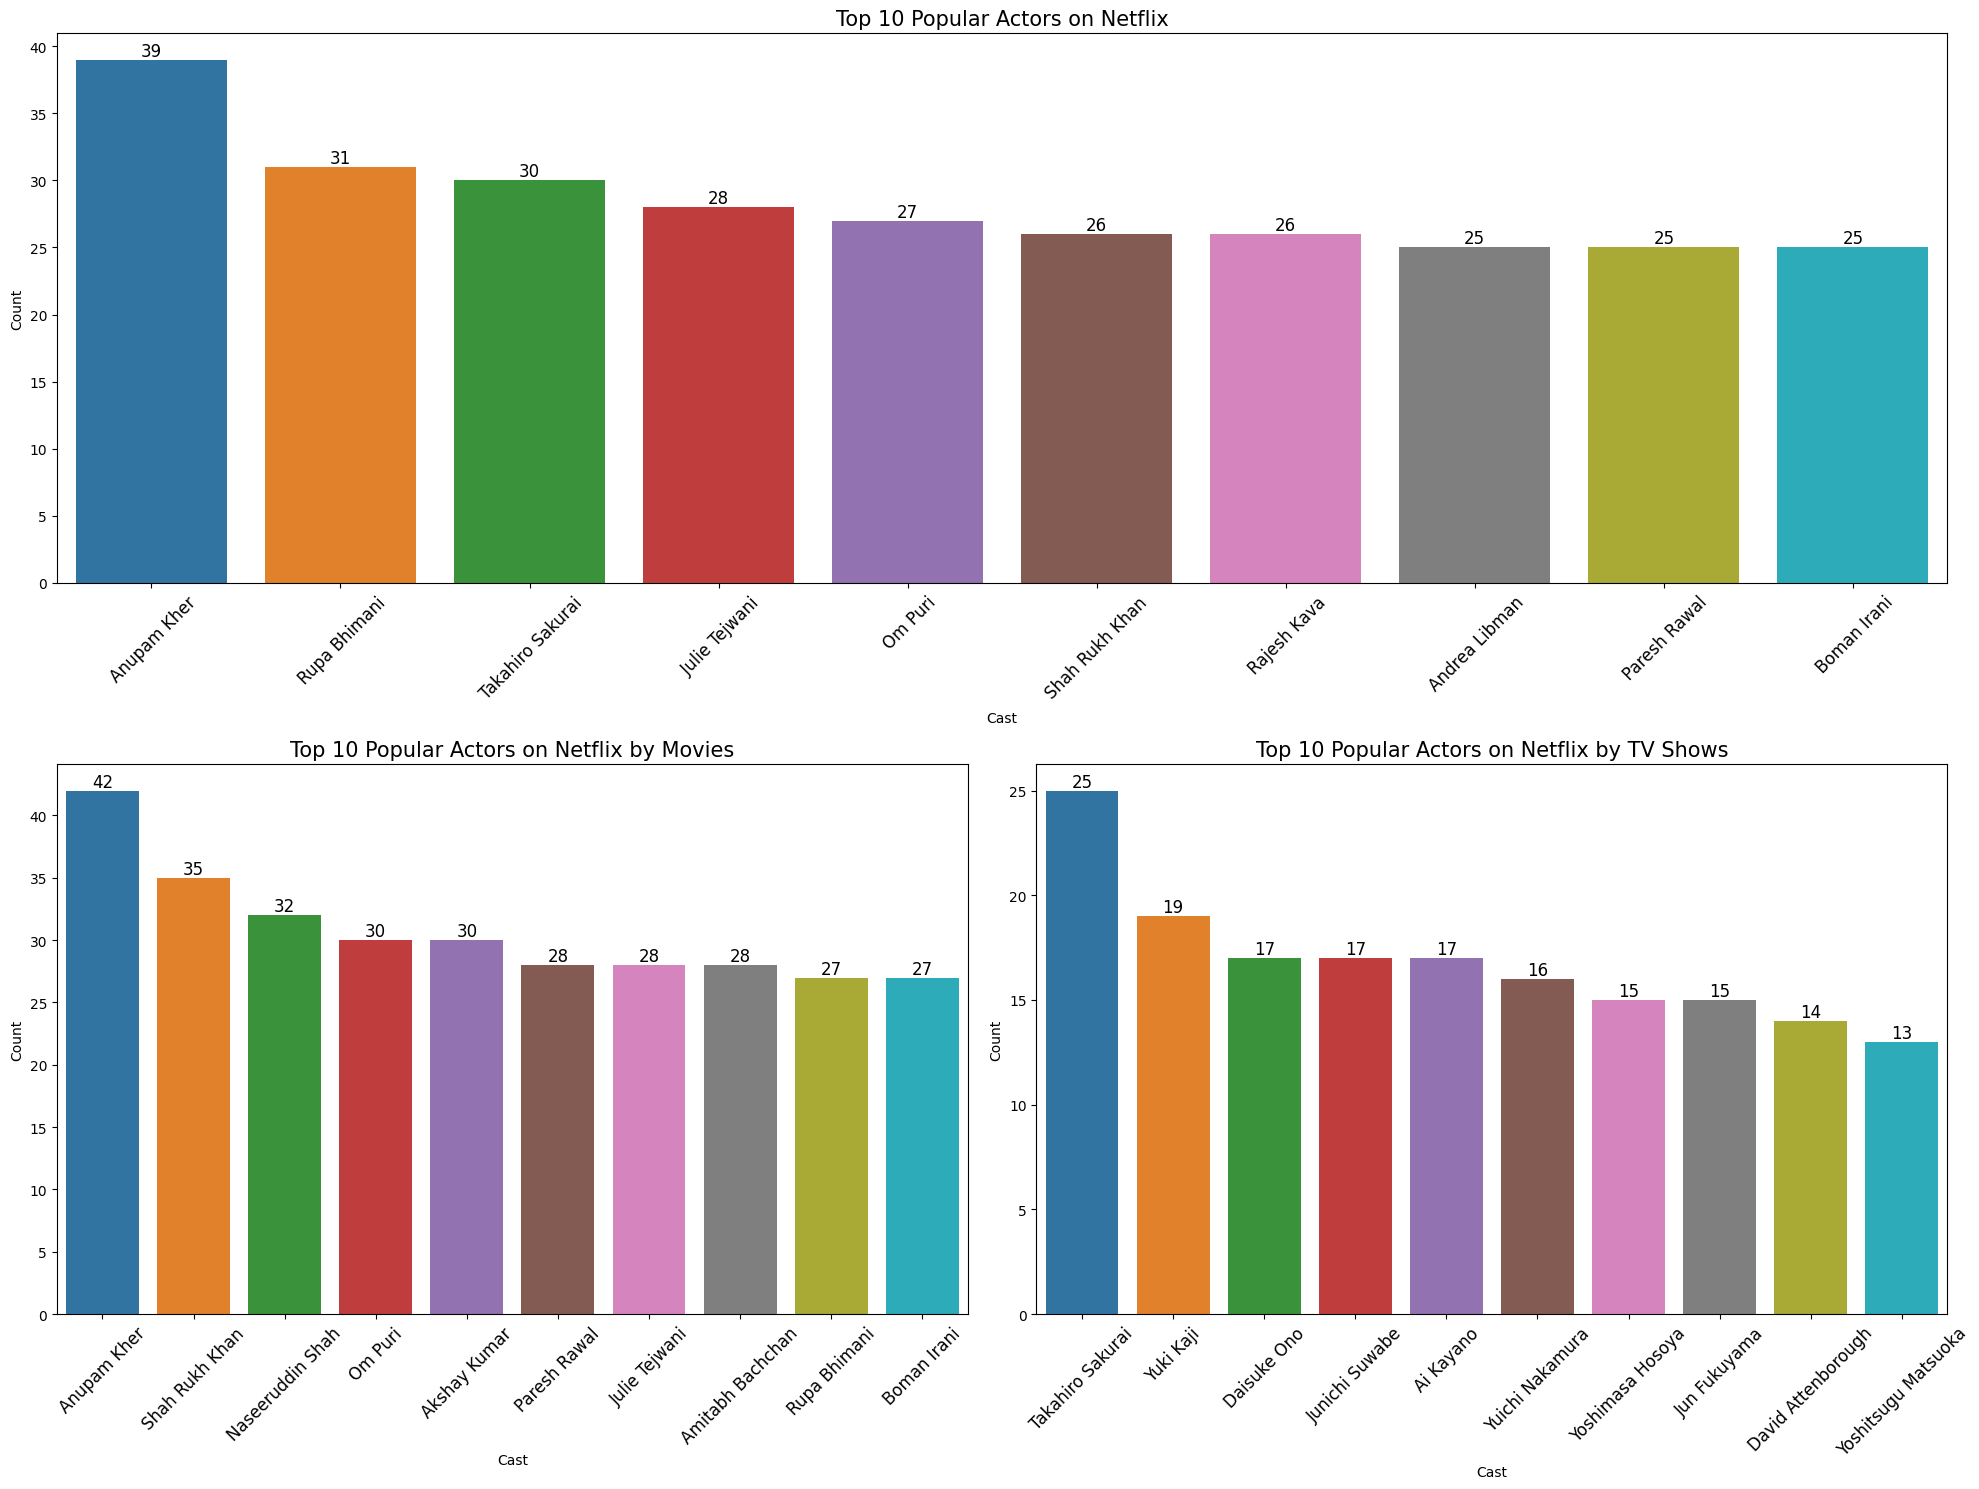

In [119]:
plt.figure(figsize = (20,15))

plt.subplot(2,1,1)
cast_barplot = sns.barplot(x = top_10_cast.index, y = top_10_cast.values)
plt.xlabel('Cast')
plt.ylabel('Count')
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Top 10 Popular Actors on Netflix", fontsize = 15)

for index, value in enumerate(top_10_cast):
  cast_barplot.text(index, value, int(value), ha = 'center', va = 'bottom', fontsize = 12)

plt.subplot(2,2,3)
cast_movie_barplot = sns.barplot(x = top_10_cast_by_movie.index, y = top_10_cast_by_movie.values)
plt.xlabel('Cast')
plt.ylabel('Count')
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Top 10 Popular Actors on Netflix by Movies", fontsize = 15)

for index, value in enumerate(top_10_cast_by_movie):
  cast_movie_barplot.text(index, value, int(value), ha = 'center', va = 'bottom', fontsize = 12)

plt.subplot(2,2,4)
cast_TV_Show_barplot = sns.barplot(x = top_10_cast_TV_Show.index, y = top_10_cast_TV_Show.values)
plt.xlabel('Cast')
plt.ylabel('Count')
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Top 10 Popular Actors on Netflix by TV Shows", fontsize = 15)

for index, value in enumerate(top_10_cast_TV_Show):
  cast_TV_Show_barplot.text(index, value, int(value), ha = 'center', va = 'bottom', fontsize = 12)

plt.tight_layout() #Used to avoid overlapping of LABELS from above subplots

#5. OVERVIEW - Insights about Top 10 Actors on Netflix

Netflix data clearly outlines that Top 10 Actors has two prominent Actors like Anupam Kher who maintains 1st position overall & by Movies, however, Takehiro Sakurai who is Top 3 overall leads in Top 10 position by TV Shows. To have visual view of how the dynamics change above graph outlines the Top 10 Actors on Netflix platform.

# **GENRE**

In [ ]:
"DATA ANALYSIS 3.1: Top 10 Genre on Netflix"

In [121]:
netflix_genre = netflix_listed_in

In [122]:
netflix_genre

listed_in show_id     type
0                Documentaries      s1    Movie
1       International TV Shows      s2  TV Show
1                    TV Dramas      s2  TV Show
1                 TV Mysteries      s2  TV Show
2               Crime TV Shows      s3  TV Show
...                        ...     ...      ...
8805  Children & Family Movies   s8806    Movie
8805                  Comedies   s8806    Movie
8806                    Dramas   s8807    Movie
8806      International Movies   s8807    Movie
8806          Music & Musicals   s8807    Movie

[19323 rows x 3 columns]

In [123]:
netflix_genre.drop(['show_id','type'], inplace = True, axis = 1)

In [124]:
netflix_genre

listed_in
0                Documentaries
1       International TV Shows
1                    TV Dramas
1                 TV Mysteries
2               Crime TV Shows
...                        ...
8805  Children & Family Movies
8805                  Comedies
8806                    Dramas
8806      International Movies
8806          Music & Musicals

[19323 rows x 1 columns]

In [125]:
netflix_genre['listed_in'] = netflix_genre['listed_in'].str.strip()
netflix_genre['listed_in'] = netflix_genre['listed_in'].str.lstrip()
netflix_genre['listed_in'] = netflix_genre['listed_in'].str.rstrip()

In [126]:
genre_count = netflix_genre['listed_in'].value_counts()
top_10_genre = genre_count.head(10)
top_10_genre

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: listed_in, dtype: int64

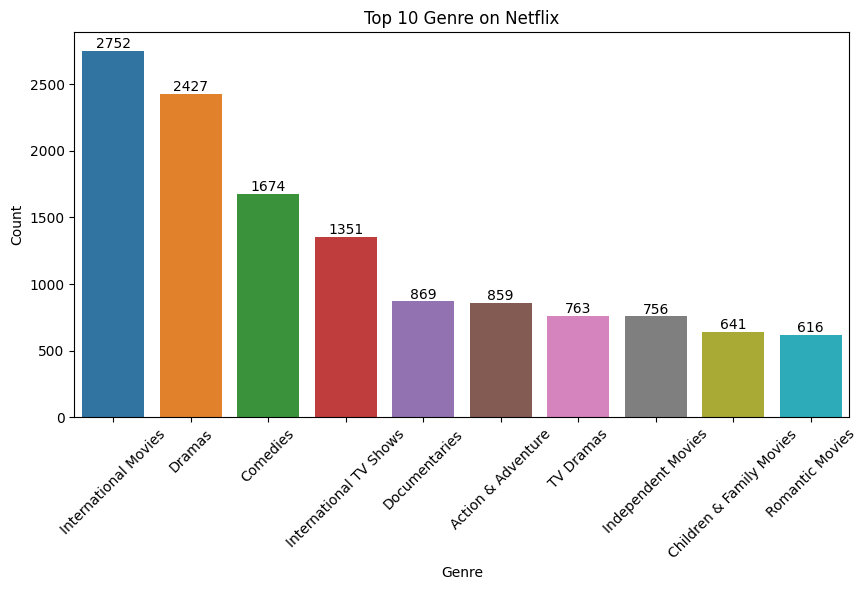

In [127]:
plt.figure(figsize = (10,5))
genre_barplot = sns.barplot(x = top_10_genre.index, y = top_10_genre.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title("Top 10 Genre on Netflix")
for index, value in enumerate(top_10_genre):
  genre_barplot.text(index, value, int(value), ha = 'center', va = 'bottom')
plt.show()

#1. Insights about Top 10 Genre on Netflix

Netflix data reflects that most sought Genre across the content is International Movies followed by Dramas and Comedy. It is noted that Romantic Movies falls at bottom in terms of bottom Top 10 content but Children & Family Movies still make the cut to Top 10.

In [ ]:
"DATA ANALYSIS 3.2: Top 10 Genre in Movies on Netflix"

In [129]:
netflix_genre_movies = netflix_listed_in

In [130]:
netflix_genre_movies['type'] = netflix['type']
netflix_genre_movies

listed_in     type
0                Documentaries    Movie
1       International TV Shows  TV Show
1                    TV Dramas  TV Show
1                 TV Mysteries  TV Show
2               Crime TV Shows  TV Show
...                        ...      ...
8805  Children & Family Movies    Movie
8805                  Comedies    Movie
8806                    Dramas    Movie
8806      International Movies    Movie
8806          Music & Musicals    Movie

[19323 rows x 2 columns]

In [131]:
netflix_genre_movies = netflix_genre_movies[netflix_genre_movies['type'] == 'Movie']
netflix_genre_movies

listed_in   type
0                Documentaries  Movie
6     Children & Family Movies  Movie
7                       Dramas  Movie
7           Independent Movies  Movie
7         International Movies  Movie
...                        ...    ...
8805  Children & Family Movies  Movie
8805                  Comedies  Movie
8806                    Dramas  Movie
8806      International Movies  Movie
8806          Music & Musicals  Movie

[13190 rows x 2 columns]

In [132]:
genre_movie_count = netflix_genre_movies['listed_in'].value_counts()
top_10_genre_movie = genre_movie_count.head(10)
top_10_genre_movie

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: listed_in, dtype: int64

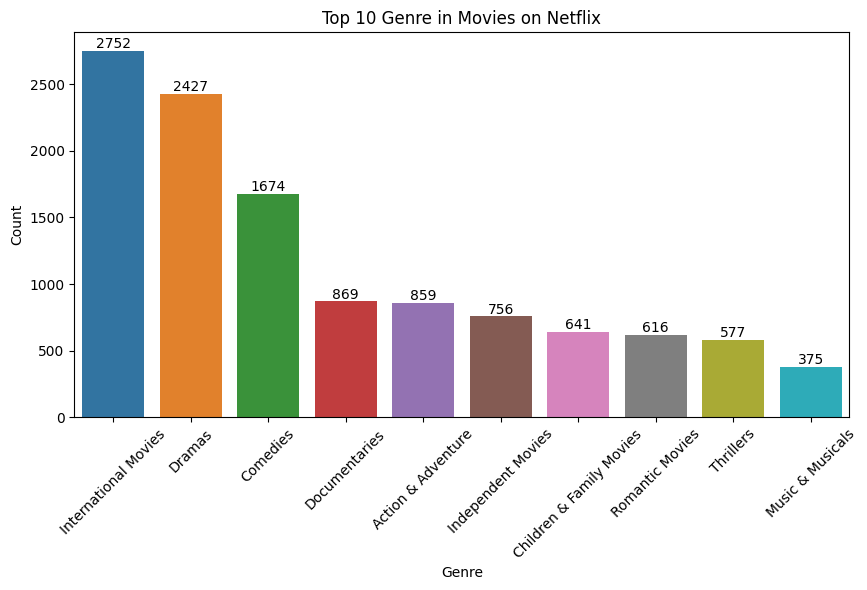

In [133]:
plt.figure(figsize = (10,5))
genre_movie_barplot = sns.barplot(x = top_10_genre_movie.index, y = top_10_genre_movie.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title("Top 10 Genre in Movies on Netflix")
for index, value in enumerate(top_10_genre_movie):
  genre_movie_barplot.text(index, value, int(value), ha = 'center', va = 'bottom')
plt.show()

#2. Insights about Top 10 Genre in Movies on Netflix

Netflix data shows that most sought Genre in Movies is again International movies which maintains its top spot across the platform. Dramas and Comedies follow the lead with Thrillers and Music & Musicals making the edge position on Top 10.

In [ ]:
"DATA ANALYSIS 3.3: Top 10 Genre in TV Shows on Netflix"

In [134]:
netflix_genre_TV_Show = netflix_listed_in

In [135]:
netflix_genre_TV_Show

listed_in     type
0                Documentaries    Movie
1       International TV Shows  TV Show
1                    TV Dramas  TV Show
1                 TV Mysteries  TV Show
2               Crime TV Shows  TV Show
...                        ...      ...
8805  Children & Family Movies    Movie
8805                  Comedies    Movie
8806                    Dramas    Movie
8806      International Movies    Movie
8806          Music & Musicals    Movie

[19323 rows x 2 columns]

In [136]:
netflix_genre_TV_Show = netflix_genre_TV_Show[netflix_genre_TV_Show['type'] == 'TV Show']
netflix_genre_TV_Show

listed_in     type
1     International TV Shows  TV Show
1                  TV Dramas  TV Show
1               TV Mysteries  TV Show
2             Crime TV Shows  TV Show
2     International TV Shows  TV Show
...                      ...      ...
8800       Romantic TV Shows  TV Show
8800               TV Dramas  TV Show
8803                Kids' TV  TV Show
8803         Korean TV Shows  TV Show
8803             TV Comedies  TV Show

[6113 rows x 2 columns]

In [137]:
genre_TV_Show_count = netflix_genre_TV_Show['listed_in'].value_counts()
top_10_genre_TV_Show = genre_TV_Show_count.head(10)
top_10_genre_TV_Show

International TV Shows    1350
TV Dramas                  762
TV Comedies                574
Crime TV Shows             469
Kids' TV                   449
Docuseries                 394
Romantic TV Shows          370
Reality TV                 255
British TV Shows           252
Anime Series               175
Name: listed_in, dtype: int64

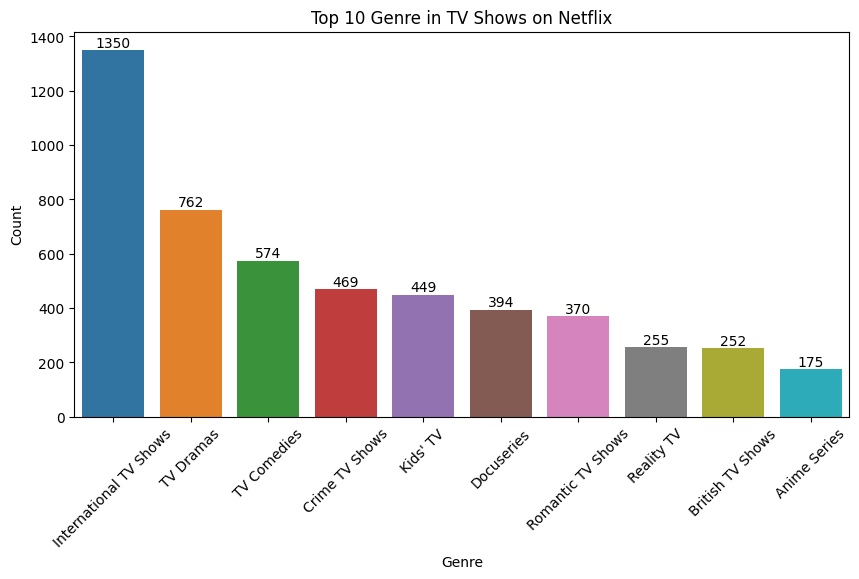

In [138]:
plt.figure(figsize = (10,5))
genre_TV_Show_barplot = sns.barplot(x = top_10_genre_TV_Show.index, y = top_10_genre_TV_Show.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title("Top 10 Genre in TV Shows on Netflix")
for index, value in enumerate(top_10_genre_TV_Show):
  genre_TV_Show_barplot.text(index, value, int(value), ha = 'center', va = 'bottom')
plt.show()

#3. Insights about Top 10 Genre in TV Shows on Netflix

Netflix data shows that most sought Genre in Movies is again International TV Shows obviously this is distinction for TV Shows given the categorization, however, International content is popular and 2nd spot is TV Dramas & TV Comedies. Interestingly just like Children & Family content in movies, TV Show Genres also has Anime series and Kid's TV in Top 10 list.

In [ ]:
"DATA ANALYSIS 3.4: Overview of Top 10 Genre on Netflix"

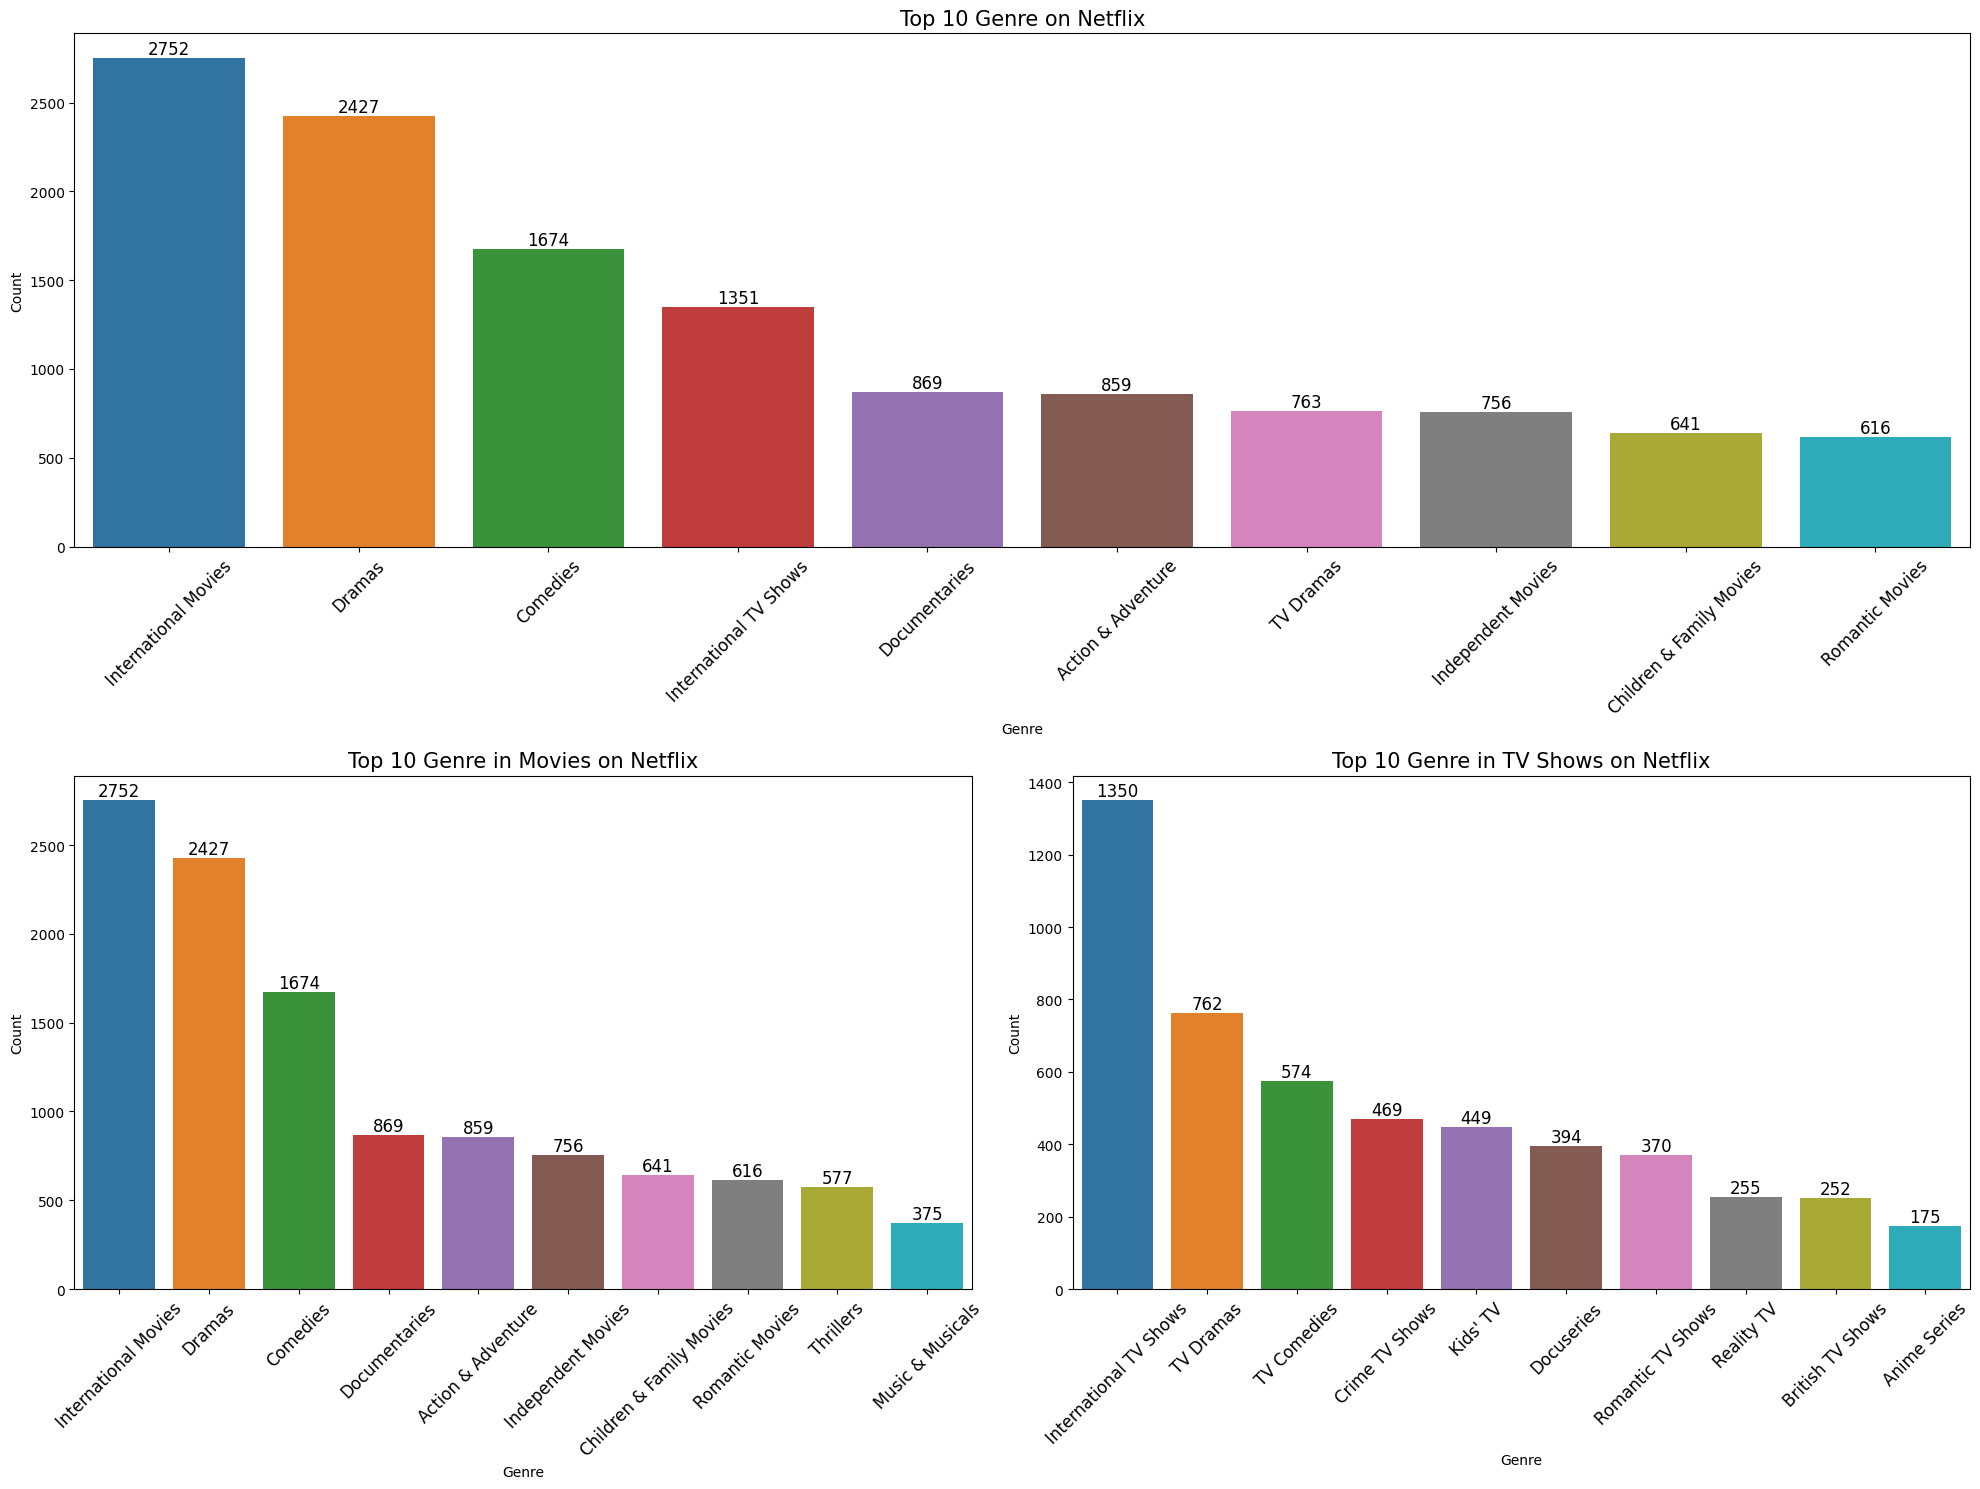

In [139]:
plt.figure(figsize = (20,15))

plt.subplot(2,1,1)
genre_barplot = sns.barplot(x = top_10_genre.index, y = top_10_genre.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Top 10 Genre on Netflix", fontsize = 15)

for index, value in enumerate(top_10_genre):
  genre_barplot.text(index, value, int(value), ha = 'center', va = 'bottom', fontsize = 12)

plt.subplot(2,2,3)
genre_movie_barplot = sns.barplot(x = top_10_genre_movie.index, y = top_10_genre_movie.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Top 10 Genre in Movies on Netflix", fontsize = 15)

for index, value in enumerate(top_10_genre_movie):
  genre_movie_barplot.text(index, value, int(value), ha = 'center', va = 'bottom', fontsize = 12)

plt.subplot(2,2,4)
genre_TV_Show_barplot = sns.barplot(x = top_10_genre_TV_Show.index, y = top_10_genre_TV_Show.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Top 10 Genre in TV Shows on Netflix", fontsize = 15)
for index, value in enumerate(top_10_genre_TV_Show):
  genre_TV_Show_barplot.text(index, value, int(value), ha = 'center', va = 'bottom', fontsize = 12)

plt.tight_layout() #Used to avoid overlapping of LABELS from above subplots

#4. Overview about Top 10 Genre on Netflix

Netflix content is quite dispersed by Genre when it comes to quality of data and caters to various taste of genre based on the dynamics, most popular content is International Movies and International TV Shows. Variety of content is distinct across Movies & TV Shows, however, it also reflects that it caters to various viewer's taste.

# **DIRECTORS**

In [ ]:
"DATA ANALYSIS 4.1: Top 10 Directors on Netflix"

In [140]:
netflix_director

director show_id     type
0     Kirsten Johnson      s1    Movie
1             No Data      s2  TV Show
2     Julien Leclercq      s3  TV Show
3             No Data      s4  TV Show
4             No Data      s5  TV Show
...               ...     ...      ...
8802    David Fincher   s8803    Movie
8803          No Data   s8804  TV Show
8804  Ruben Fleischer   s8805    Movie
8805     Peter Hewitt   s8806    Movie
8806      Mozez Singh   s8807    Movie

[9612 rows x 3 columns]

In [141]:
netflix_director['director'] = netflix_director['director'].str.strip()
netflix_director['director'] = netflix_director['director'].str.lstrip()
netflix_director['director'] = netflix_director['director'].str.rstrip()

In [142]:
director_count = netflix_director['director'].value_counts()[1:]
top_10_director = director_count.head(10)
top_10_director

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: director, dtype: int64

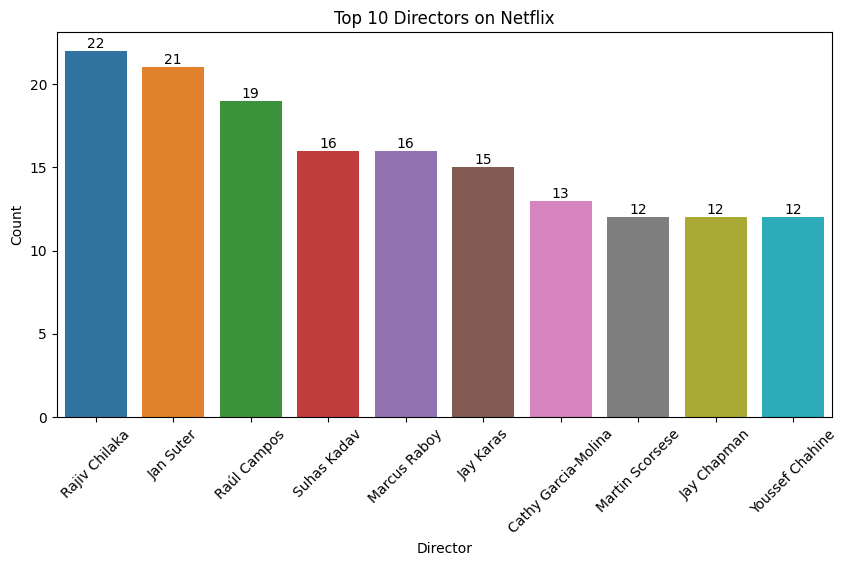

In [143]:
plt.figure(figsize = (10,5))
director_barplot = sns.barplot(x = top_10_director.index, y = top_10_director.values)
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title("Top 10 Directors on Netflix")
for index, value in enumerate(top_10_director):
  director_barplot.text(index, value, int(value), ha = 'center', va = 'bottom')
plt.show()

#1. Insights about Top Directors on Netflix

Netflix data reflects that Rajiv Chilaka is the most acclaimed directors across the content directed on the platform. It throws a useful insight on above list of Top 10 Directors who contribute to the most published content.

In [ ]:
"DATA ANALYSIS 4.2: Top 10 Movie Directors on Netflix"

In [144]:
netflix_director_movie = netflix_director[netflix_director["type"] == "Movie"]
netflix_director_movie

director show_id   type
0     Kirsten Johnson      s1  Movie
6       Robert Cullen      s7  Movie
6      José Luis Ucha      s7  Movie
7        Haile Gerima      s8  Movie
9      Theodore Melfi     s10  Movie
...               ...     ...    ...
8801  Majid Al Ansari   s8802  Movie
8802    David Fincher   s8803  Movie
8804  Ruben Fleischer   s8805  Movie
8805     Peter Hewitt   s8806  Movie
8806      Mozez Singh   s8807  Movie

[6854 rows x 3 columns]

In [145]:
movie_director_count = netflix_director_movie['director'].value_counts()[1:]
top_10_movie_director = movie_director_count.head(10)
top_10_movie_director

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Jay Karas              15
Marcus Raboy           15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Jay Chapman            12
Name: director, dtype: int64

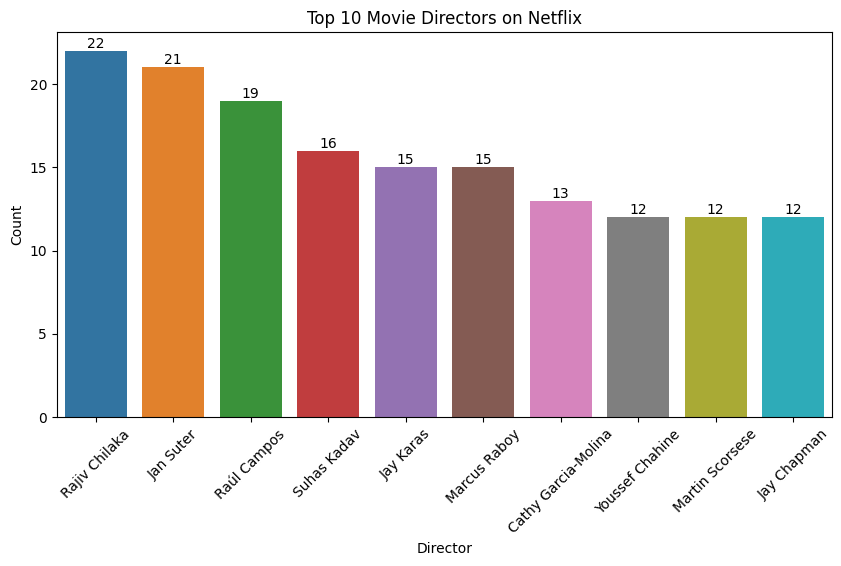

In [146]:
plt.figure(figsize = (10,5))
movie_director_barplot = sns.barplot(x = top_10_movie_director.index, y = top_10_movie_director.values)
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title("Top 10 Movie Directors on Netflix")
for index, value in enumerate(top_10_movie_director):
  movie_director_barplot.text(index, value, int(value), ha = 'center', va = 'bottom')
plt.show()

#2. Insights about Top Movie Directors on Netflix

Netflix data reflects that Rajiv Chilaka is still the most acclaimed directors across for movies directed on the platform. Dynamics changes a bit when we filter by movies

In [ ]:
"DATA ANALYSIS 4.3: Top 10 Movie Directors on Netflix"

In [148]:
netflix_director_TV_Show = netflix_director[netflix_director["type"] == "TV Show"]
netflix_director_TV_Show

director show_id     type
1             No Data      s2  TV Show
2     Julien Leclercq      s3  TV Show
3             No Data      s4  TV Show
4             No Data      s5  TV Show
5       Mike Flanagan      s6  TV Show
...               ...     ...      ...
8795          No Data   s8796  TV Show
8796          No Data   s8797  TV Show
8797          No Data   s8798  TV Show
8800          No Data   s8801  TV Show
8803          No Data   s8804  TV Show

[2758 rows x 3 columns]

In [149]:
TV_Show_director_count = netflix_director_TV_Show['director'].value_counts()[1:]
top_10_TV_Show_director = TV_Show_director_count.head(10)
top_10_TV_Show_director

Alastair Fothergill      3
Ken Burns                3
Iginio Straffi           2
Gautham Vasudev Menon    2
Hsu Fu-chun              2
Stan Lathan              2
Shin Won-ho              2
Joe Berlinger            2
Lynn Novick              2
Rob Seidenglanz          2
Name: director, dtype: int64

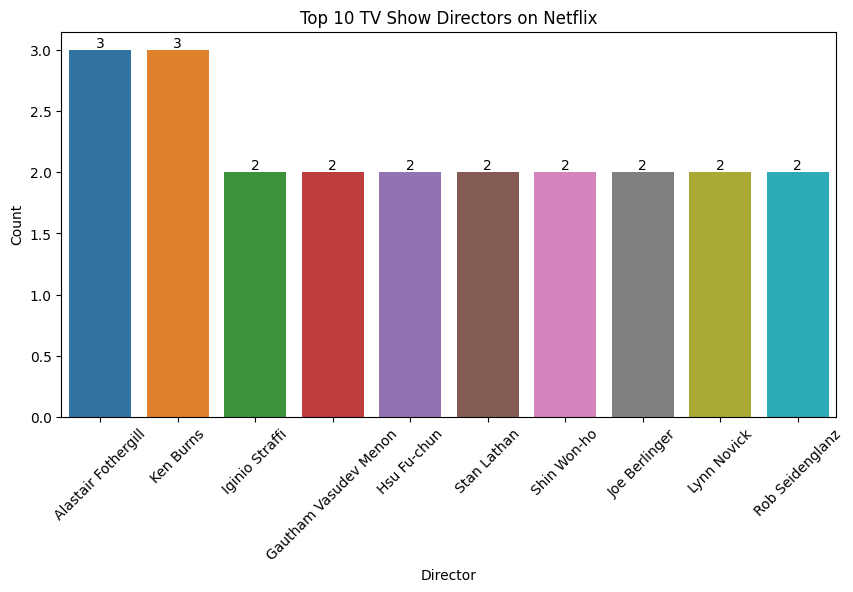

In [150]:
plt.figure(figsize = (10,5))
TV_Show_director_barplot = sns.barplot(x = top_10_TV_Show_director.index, y = top_10_TV_Show_director.values)
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.title("Top 10 TV Show Directors on Netflix")
for index, value in enumerate(top_10_TV_Show_director):
  TV_Show_director_barplot.text(index, value, int(value), ha = 'center', va = 'bottom')
plt.show()

#3. Insights about Top TV Show Directors on Netflix

Netflix data shows that there is lot of close competition in terms of TV shows produced with Top Directors Alastair Fothergill and Ken Burns which are not very far from remaining directors in the Top 10 list as the list is quite concentrated. It would be bit difficult to draw out the most acclaimed one based on current data.

In [ ]:
"DATA ANALYSIS 4.4: Overview of Top 10 Directors on Netflix"

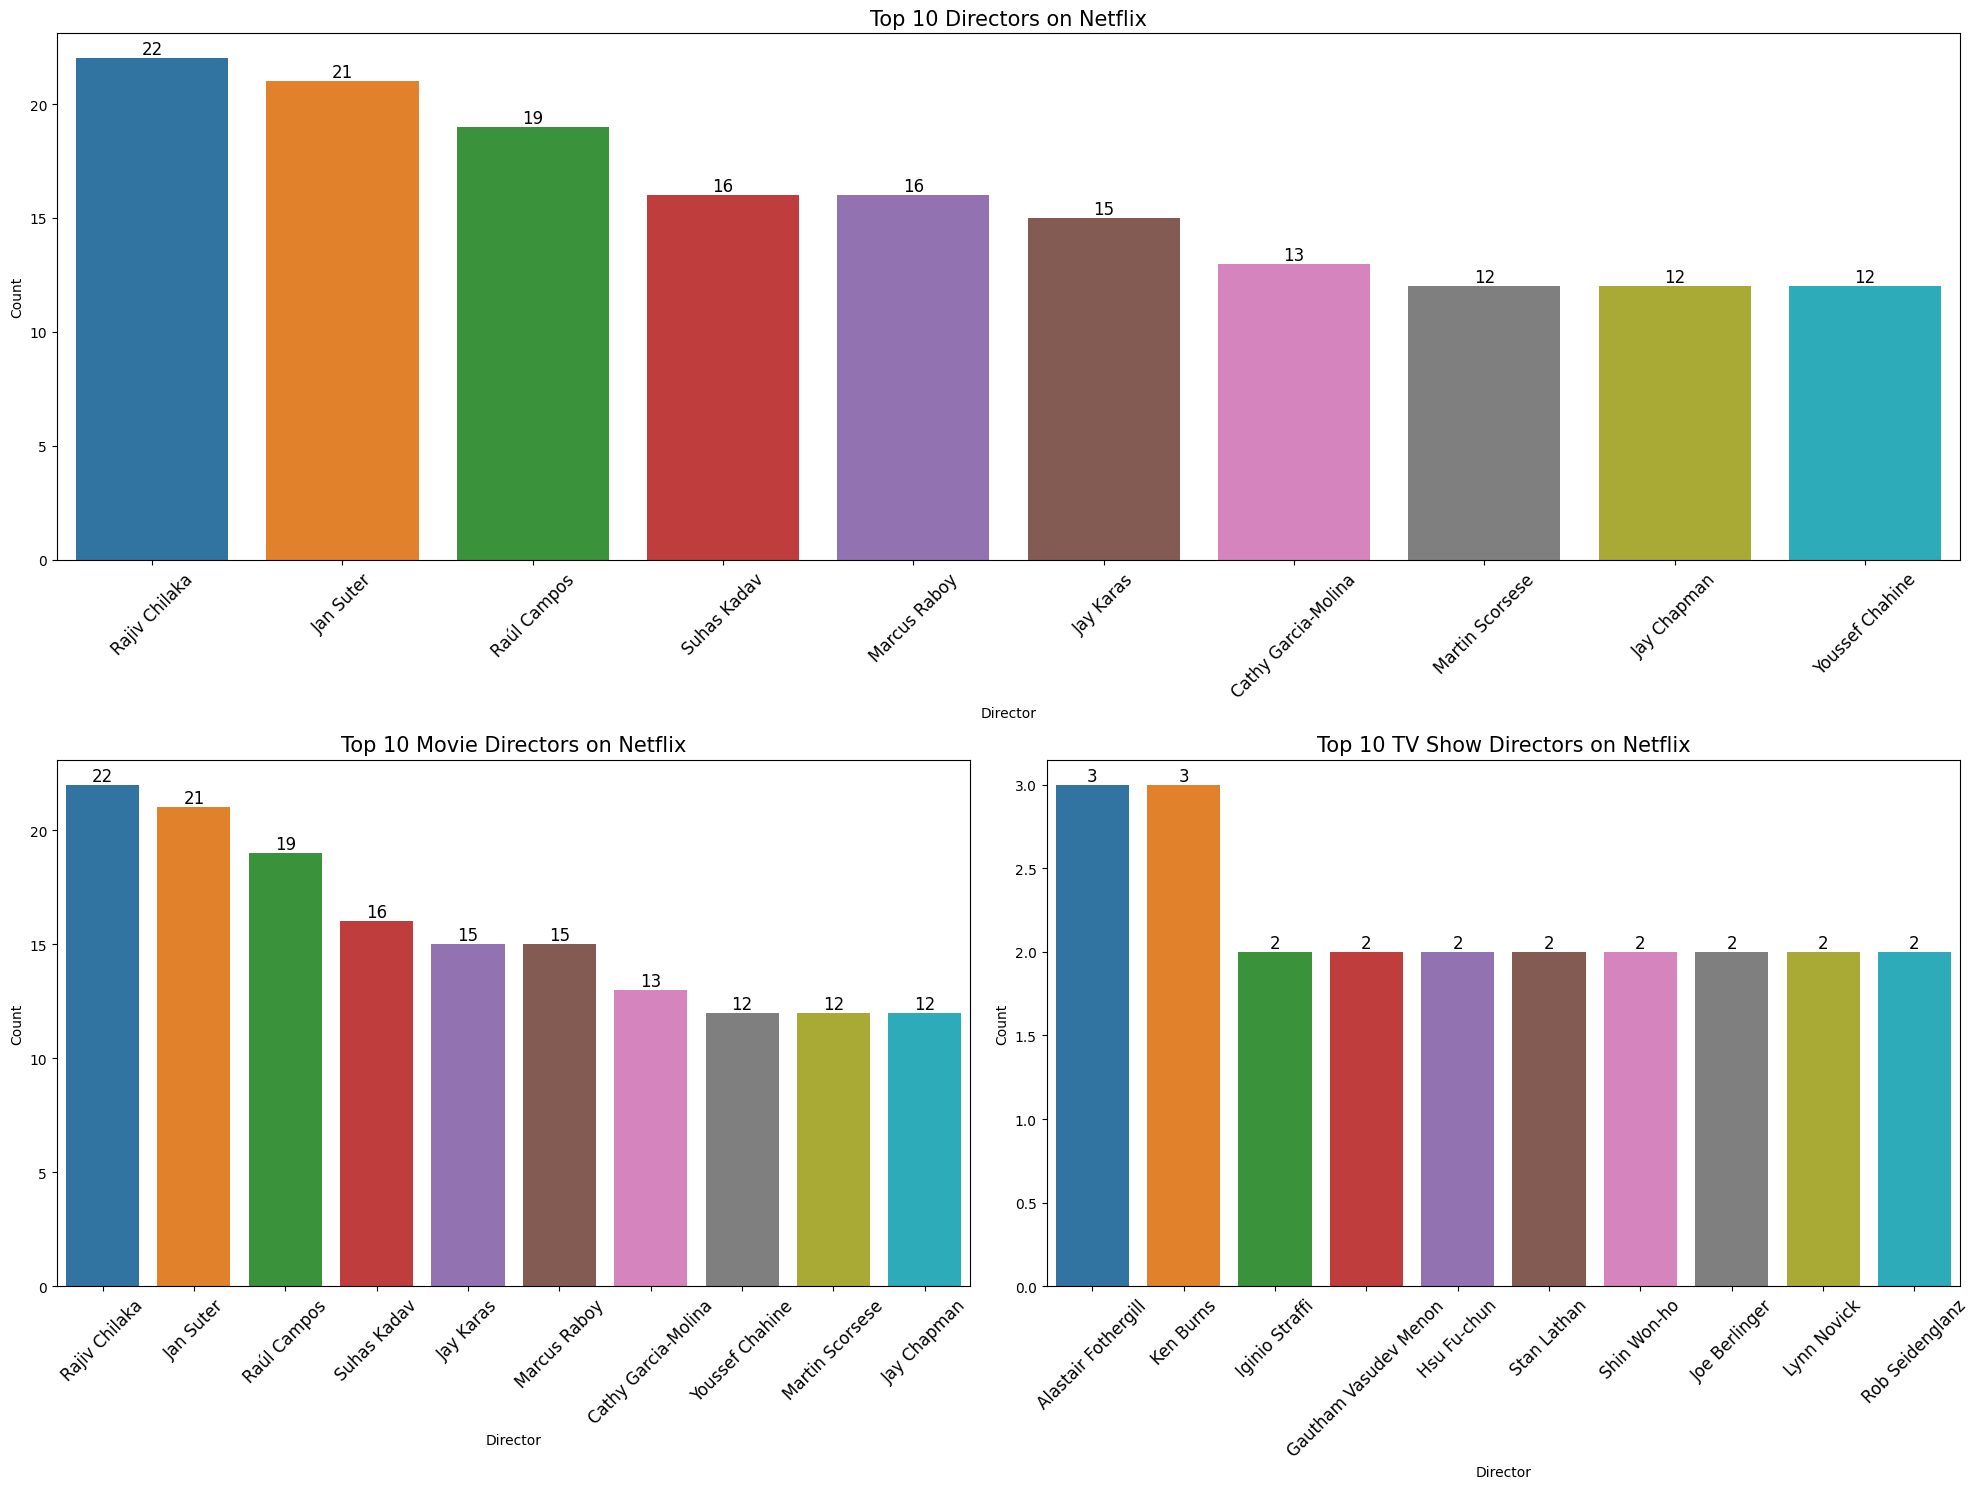

In [151]:
plt.figure(figsize = (20,15))

plt.subplot(2,1,1)
director_barplot = sns.barplot(x = top_10_director.index, y = top_10_director.values)
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Top 10 Directors on Netflix", fontsize = 15)
for index, value in enumerate(top_10_director):
  director_barplot.text(index, value, int(value), ha = 'center', va = 'bottom', fontsize = 12)

plt.subplot(2,2,3)
movie_director_barplot = sns.barplot(x = top_10_movie_director.index, y = top_10_movie_director.values)
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Top 10 Movie Directors on Netflix", fontsize = 15)
for index, value in enumerate(top_10_movie_director):
  movie_director_barplot.text(index, value, int(value), ha = 'center', va = 'bottom', fontsize = 12)

plt.subplot(2,2,4)
TV_Show_director_barplot = sns.barplot(x = top_10_TV_Show_director.index, y = top_10_TV_Show_director.values)
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Top 10 TV Show Directors on Netflix", fontsize = 15)
for index, value in enumerate(top_10_TV_Show_director):
  TV_Show_director_barplot.text(index, value, int(value), ha = 'center', va = 'bottom', fontsize = 12)

plt.tight_layout() #Used to avoid overlapping of LABELS from above subplots

#4. Overview about Top TV Show Directors on Netflix

On Netflix, Rajiv Shukla is the most prominent Director overall including Movies category with Alaistair Fothergill on Top spot amongs TV Show by Directors.

# **EVOLUTION OF NETFLIX**

In [ ]:
"DATA ANALYSIS 5.1: Overview of Content Added on Netflix by Period"

In [ ]:
'Distinction by Movies'

In [152]:
netflix_movies = netflix[netflix['type'] == 'Movie']

In [153]:
movies_count_Y = netflix_movies['year_added'].value_counts().sort_index()

In [154]:
movies_count_M = netflix_movies['month_added'].value_counts().sort_index()
max_count_M = movies_count_M.max()

In [155]:
movies_count_YM = netflix_movies['YYYY-MM'].value_counts().sort_index()

In [ ]:
'Distinction by TV Shows'

In [156]:
netflix_TV_Show = netflix[netflix['type'] == 'TV Show']

In [157]:
TV_Show_count_Y = netflix_TV_Show['year_added'].value_counts().sort_index()

In [158]:
TV_Show_count_M = netflix_movies['month_added'].value_counts().sort_index()
max_count_TV = TV_Show_count_M.max()

In [159]:
TV_Show_count_YM = netflix_movies['YYYY-MM'].value_counts().sort_index()

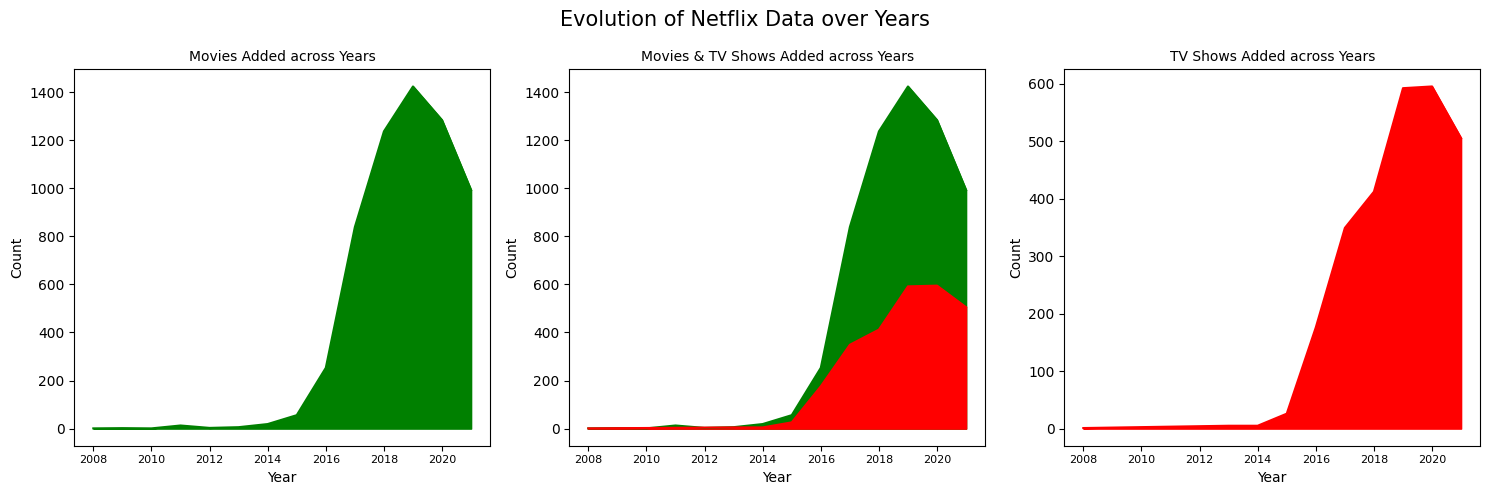

In [160]:
plt.figure(1, figsize = (15,5)).suptitle("Evolution of Netflix Data over Years", fontsize = 15)

plt.subplot(1,3,1)
sns.lineplot(x = movies_count_Y.index, y = movies_count_Y.values, color = 'green')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 0, fontsize = 8)
plt.title("Movies Added across Years", fontsize = 10)
plt.fill_between(movies_count_Y.index, movies_count_Y.values, color='green')

plt.subplot(1,3,2)
sns.lineplot(x = movies_count_Y.index, y = movies_count_Y.values, color = 'green')
sns.lineplot(x = TV_Show_count_Y.index, y = TV_Show_count_Y.values, color = 'red')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 0, fontsize = 8)
plt.title("Movies & TV Shows Added across Years", fontsize = 10)
plt.fill_between(movies_count_Y.index, movies_count_Y.values, color='green')
plt.fill_between(TV_Show_count_Y.index, TV_Show_count_Y.values, color='red')

plt.subplot(1,3,3)
sns.lineplot(x = TV_Show_count_Y.index, y = TV_Show_count_Y.values, color = 'red')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 0, fontsize = 8)
plt.title("TV Shows Added across Years", fontsize = 10)
plt.fill_between(TV_Show_count_Y.index, TV_Show_count_Y.values, color='red')

plt.tight_layout() #Used to avoid overlapping of LABELS from above subplots

#1. Insights about Addition of Movies & TV Shows across Years on Netflix

Based on the above 3 graphs, it is notable that the growth of content begin in 2016 and peak amount of content was concentrated between 2018 and 2020. Further, data added in both type of content has similar pattern. However, if we look at each type of content added over years, movies were added almost twice the TV Show data but correlation of addition is same.

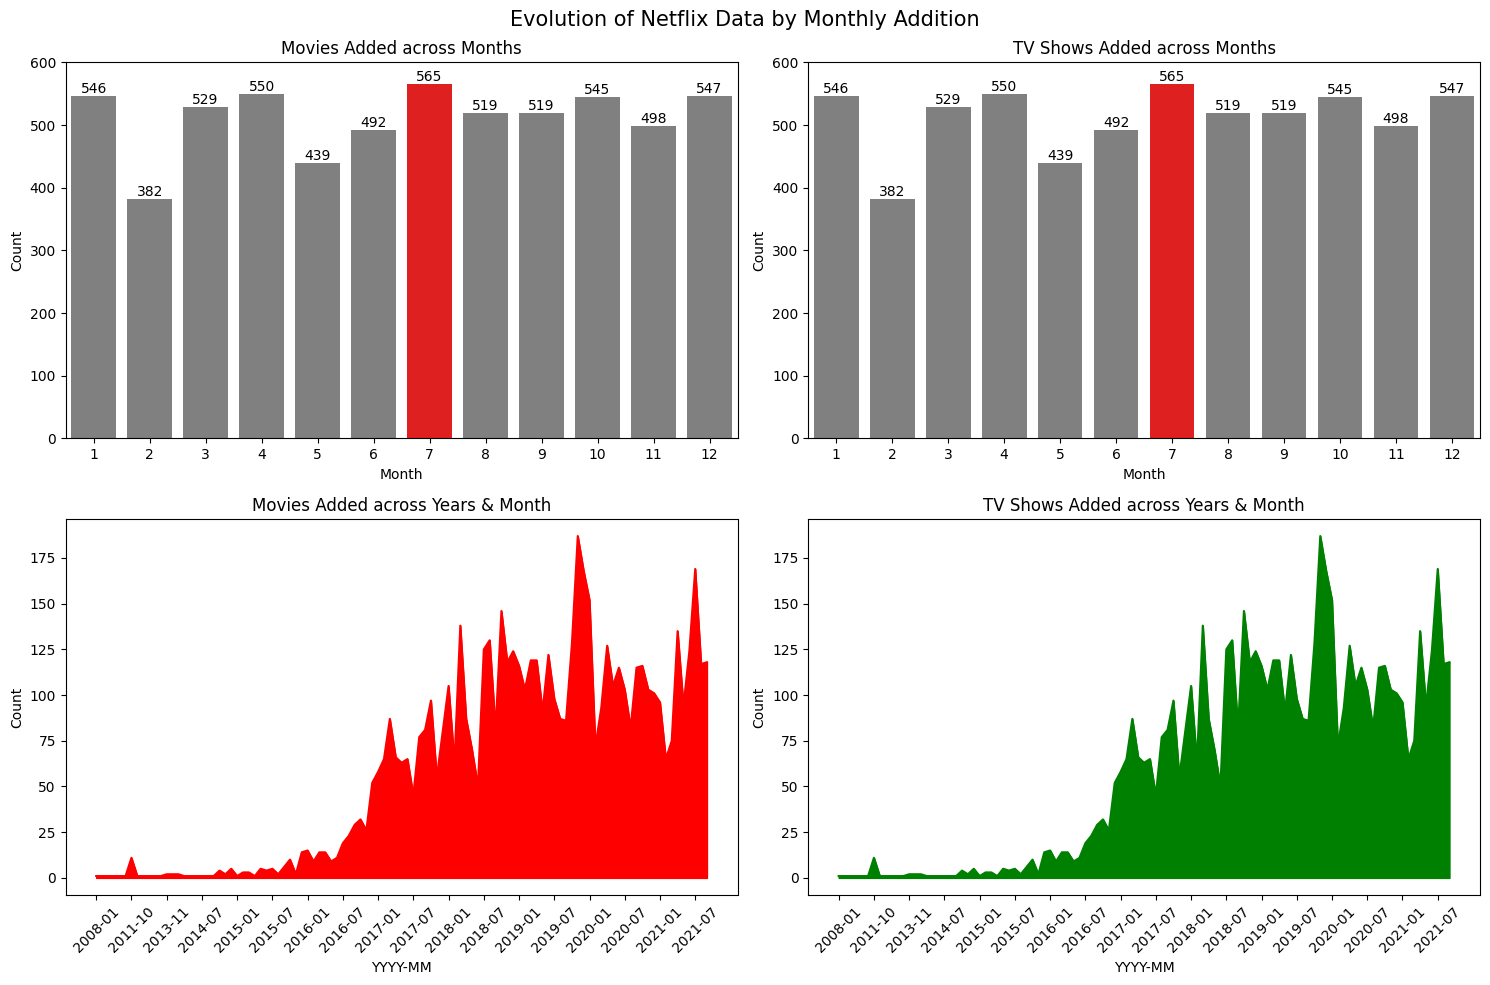

In [161]:
plt.figure(figsize = (15,10)).suptitle("Evolution of Netflix Data by Monthly Addition", fontsize = 15)

colors = ['Red' if count == max_count_M else 'grey' for count in movies_count_M]
plt.subplot(2,2,1)
movies_barplot = sns.barplot(x = movies_count_M.index, y = movies_count_M.values, palette = colors)
plt.xlabel('Month')
plt.ylabel('Count')
plt.ylim(0,600)
plt.xticks(rotation = 0, fontsize = 10)
plt.title("Movies Added across Months", fontsize = 12)
for index, value in enumerate(movies_count_M.values):
    movies_barplot.text(index, value, str(value), ha='center', va='bottom')

colors = ['Red' if count == max_count_TV else 'grey' for count in TV_Show_count_M]
plt.subplot(2,2,2)
TV_Show_barplot = sns.barplot(x = TV_Show_count_M.index, y = TV_Show_count_M.values, palette = colors)
plt.xlabel('Month')
plt.ylabel('Count')
plt.ylim(0,600)
plt.xticks(rotation = 0, fontsize = 10)
plt.title("TV Shows Added across Months", fontsize = 12)
for index, value in enumerate(TV_Show_count_M.values):
    TV_Show_barplot.text(index, value, str(value), ha='center', va='bottom')

xticks_interval = 6
x_labels = movies_count_YM.index[::xticks_interval]

plt.subplot(2,2,3)
sns.lineplot(x = movies_count_YM.index, y = movies_count_YM.values, color = 'red')
plt.xlabel('YYYY-MM')
plt.ylabel('Count')
plt.xticks(x_labels, rotation = 45, fontsize = 10)
plt.title("Movies Added across Years & Month", fontsize = 12)
plt.fill_between(TV_Show_count_YM.index, TV_Show_count_YM.values, color='red')

xticks_interval = 6
x_labels = movies_count_YM.index[::xticks_interval]

plt.subplot(2,2,4)
sns.lineplot(x = TV_Show_count_YM.index, y = TV_Show_count_YM.values, color = 'green')
plt.xlabel('YYYY-MM')
plt.ylabel('Count')
plt.xticks(x_labels, rotation = 45, fontsize = 10)
plt.title("TV Shows Added across Years & Month", fontsize = 12)
plt.fill_between(TV_Show_count_YM.index, TV_Show_count_YM.values, color='green')

plt.tight_layout() #Used to avoid overlapping of LABELS from above subplots

#2. Insights about Addition of Movies & TV Shows across Years by Month on Netflix

Netflix data outlies that peak addition of data is mostly in July but there are some other intervals like April, October and December where the new content is added. This behaviour is common across any content type i.e new movies and TV shows are added at the same time.

Further, for Movies it is noted that highest amount of content was added in Oct 2019 and Jul 2021. Although, we have distinct graphs but even TV Shows have same footrpint as it is for movies.

# **RATINGS DISTRIBUTION**

In [ ]:
"DATA ANALYSIS 6.1: Overview of Ratings Distribution"

In [162]:
netflix_rating_count

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

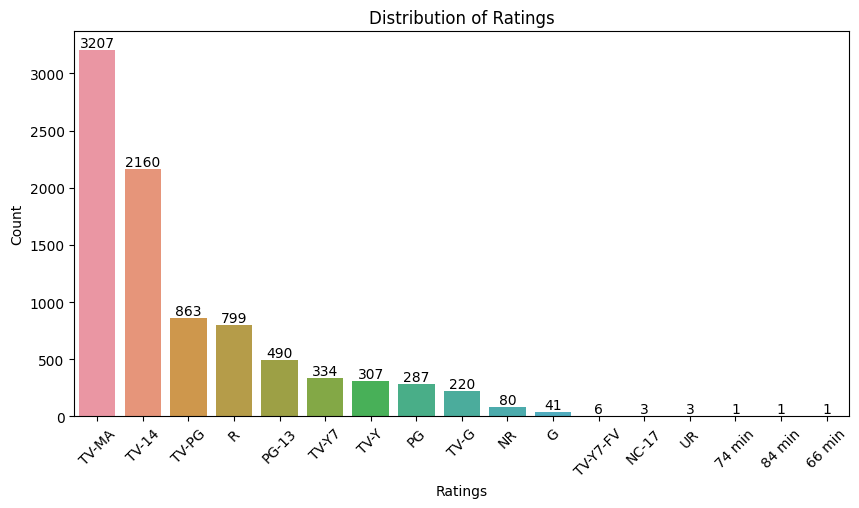

In [163]:
plt.figure(figsize = (10,5))

barplot = sns.barplot(x = netflix_rating_count.index, y = netflix_rating_count.values)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation = 45, fontsize = 10)
plt.title("Distribution of Ratings", fontsize = 12)
for index, value in enumerate(netflix_rating_count.values):
    barplot.text(index, value, str(value), ha='center', va='bottom')

#1. Insights about Distribution of Ratings on Netflix

Based on the graph above it is quite interesting to know that Ratings 'TV-MA' is the most popular rating in Netflix world, now this rating technical in nature but atleast it helps us identify common rating categories with relative frequency.

# **Distribution of Movie Lengths and TV Show Episode Counts**

In [ ]:
"DATA ANALYSIS 7.1: Overview of Movie Duration & TV Show Episodes Distribution"

In [166]:
netflix_duration_count

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [174]:
movies_length = netflix_movies['duration'].str.extract('(\d+)', expand=False).astype(int)
movies_length

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6131, dtype: int64

In [175]:
tv_show_episodes = netflix_TV_Show['duration'].str.extract('(\d+)', expand=False).astype(int)
tv_show_episodes

1       2
2       1
3       1
4       2
5       1
       ..
8795    2
8796    2
8797    3
8800    1
8803    2
Name: duration, Length: 2666, dtype: int64

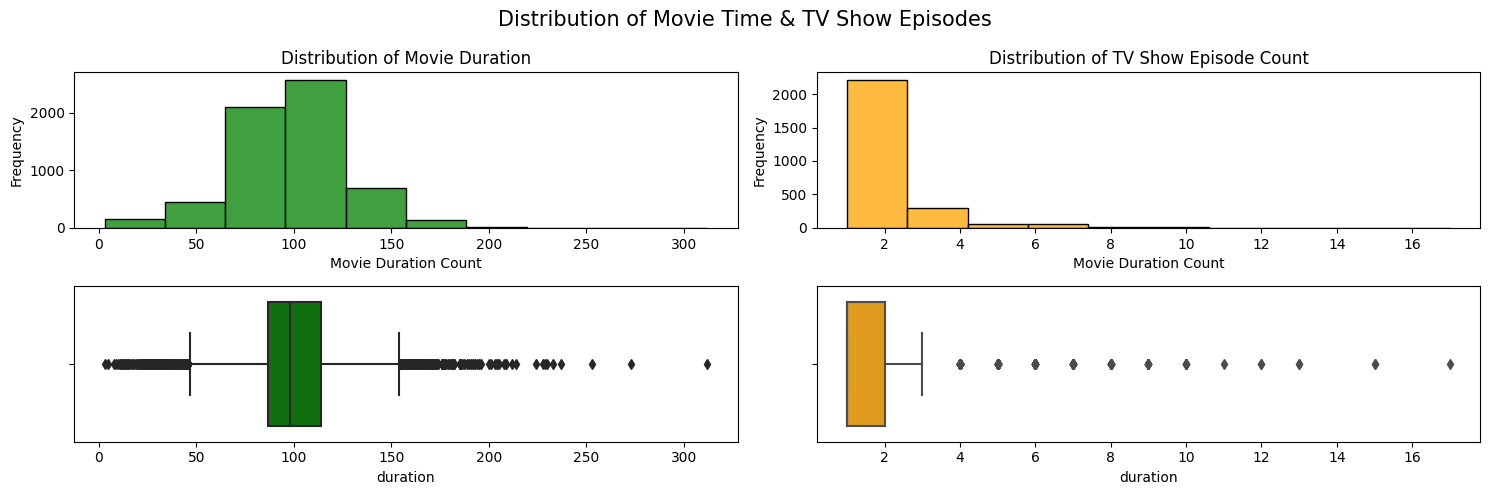

In [193]:
plt.figure(1, figsize = (15,5)).suptitle("Distribution of Movie Time & TV Show Episodes", fontsize = 15)

plt.subplot(2,2,1)
sns.histplot(movies_length, bins = 10, color = "green")
plt.xlabel('Movie Duration Count')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Duration')

plt.subplot(2,2,2)
sns.histplot(tv_show_episodes, bins = 10, color = "orange")
plt.xlabel('Movie Duration Count')
plt.ylabel('Frequency')
plt.title('Distribution of TV Show Episode Count')

plt.subplot(2,2,3)
sns.boxplot(x = movies_length, data = netflix, color = "green")
plt.subplot(2,2,4)
sns.boxplot(x= tv_show_episodes, data = netflix, color = "orange")

plt.tight_layout()

#1. Insights about Distribution of Movie Duration & Episodes of TV Shows on Netflix

Analyzing the histograms, we can observe that most movies on Netflix have a duration of around 100 minutes. On the other hand, most TV shows on Netflix have only one season on Netflix. By further examination on box plots, we can see that movies longer than approximately 2.5 hours are considered outliers. For TV shows, finding those with more than four seasons is uncommon.

# **TREND OF CONTENT OVER YEARS**

In [ ]:
"DATA ANALYSIS 8.1: Trend analysis of Movies & TV Shows released across Years"

In [194]:
movies_length

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6131, dtype: int64

In [195]:
tv_show_episodes

1       2
2       1
3       1
4       2
5       1
       ..
8795    2
8796    2
8797    3
8800    1
8803    2
Name: duration, Length: 2666, dtype: int64

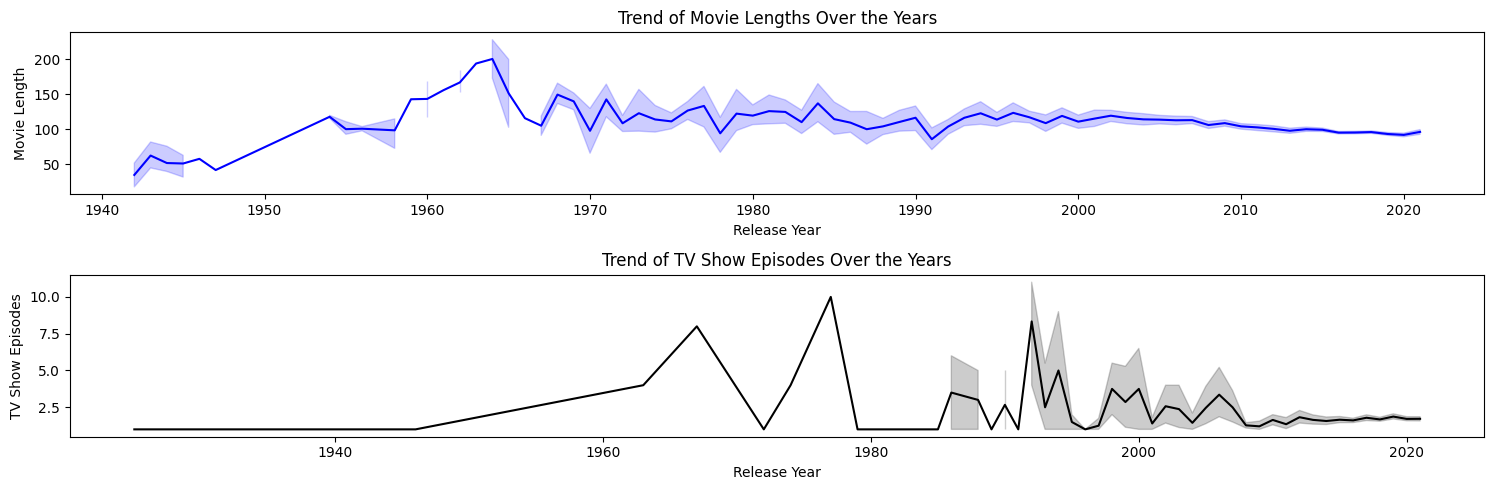

In [197]:
plt.figure(figsize=(15, 5))

plt.subplot(2, 1, 1)
sns.lineplot(data = netflix_movies, x='release_year', y= movies_length, color = 'blue')
plt.xlabel('Release Year')
plt.ylabel('Movie Length')
plt.title('Trend of Movie Lengths Over the Years')

plt.subplot(2, 1, 2)
sns.lineplot(data= netflix_TV_Show , x='release_year', y= tv_show_episodes, color = 'black')
plt.xlabel('Release Year')
plt.ylabel('TV Show Episodes')
plt.title('Trend of TV Show Episodes Over the Years')

plt.tight_layout()

plt.show()

#1. Trend analysis of Movies & TV Shows released across Years on Netflix

Analyzing above line charts, we get exciting patterns. Movie length initially increased until around 1963-1964 and then gradually dropped, stabilizing around an average of 100 minutes. This suggests a shift in audience preferences over time.

For TV show episodes, a consistent trend is visible since the early 2000s, where most TV shows on Netflix have one to three seasons. This indicates a preference for shorter series or limited series formats among viewers.

# **Word Cloud & Universe of Content**

In [ ]:
"DATA ANALYSIS 9.1: Analyze themes, genres and create thumbnail"

In [213]:
text_title = ' '.join(netflix['title'])
text_title

'Dick Johnson Is Dead Blood & Water Ganglands Jailbirds New Orleans Kota Factory Midnight Mass My Little Pony: A New Generation Sankofa The Great British Baking Show The Starling Vendetta: Truth, Lies and The Mafia Bangkok Breaking Je Suis Karl Confessions of an Invisible Girl Crime Stories: India Detectives Dear White People Europe\'s Most Dangerous Man: Otto Skorzeny in Spain Falsa identidad Intrusion Jaguar Monsters Inside: The 24 Faces of Billy Milligan Resurrection: Ertugrul Avvai Shanmughi Go! Go! Cory Carson: Chrissy Takes the Wheel Jeans Love on the Spectrum Minsara Kanavu Grown Ups Dark Skies Paranoia Ankahi Kahaniya Chicago Party Aunt Sex Education Squid Game Tayo and Little Wizards The Father Who Moves Mountains The Stronghold Angry Birds Birth of the Dragon Chhota Bheem He-Man and the Masters of the Universe Jaws Jaws 2 Jaws 3 Jaws: The Revenge My Heroes Were Cowboys Safe House The Smart Money Woman Training Day Castle and Castle Dharmakshetra InuYasha the Movie 2: The Cast

In [214]:
text_description = ' '.join(netflix['description'])
text_description

'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable. After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth. To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war. Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series. In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life. The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe. Equestria\'s divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be

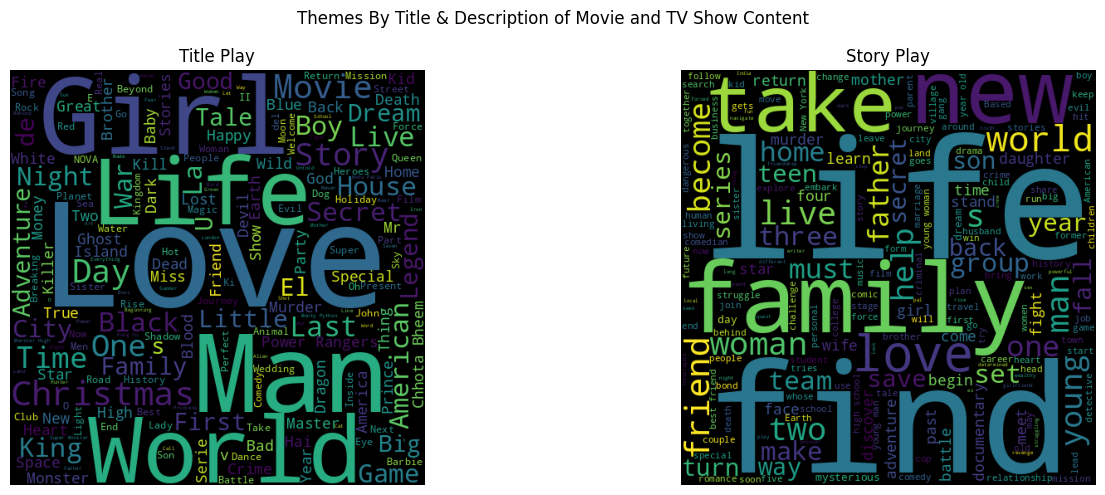

In [221]:
from wordcloud import WordCloud
plt.figure(figsize=(15, 5)).suptitle("Themes By Title & Description of Movie and TV Show Content")

plt.subplot(1, 2, 1)
wordcloud_text = WordCloud(width = 500, height = 500).generate(text_title)
plt.imshow(wordcloud_text)
plt.title("Title Play")
plt.axis("off")

plt.subplot(1, 2, 2)
wordcloud_description = WordCloud(width = 500, height = 500).generate(text_description)
plt.imshow(wordcloud_description)
plt.title("Story Play")
plt.axis("off")

plt.tight_layout()
plt.show()

#1. Insights about Title Play of words & Story Play of words from Movie / TV Show Description

Review & word cloud for titles says that terms like “Love,” “Girl,” “Man,” “Life,” and “World” are frequently used, indicating the presence of romantic, coming-of-age, and drama genres in Netflix’s content library.

Further analyzing the word cloud for descriptions, dominant words such as “life,” “find,” and “family,” suggesting themes of personal journeys, relationships, and family dynamics are prevalent in Netflix’s content.

# CONCLUSION OF NETFLIX CASE STUDY & INSIGHTS!

1.   **OVERVIEW OF NETFLIX DATASET**:\
It is notable that the data provided has 12 columns with around 9000 line items. Data is highly qualitative to analyze and derive insights with count & period playing a major role. Data quality could have been better we had minimalistic Nan & NaT values to do comprehensive study.
2.   **CONTENT**:\
My analysis revealed that Netflix had added more Movies than TV shows, aligning with the expectation that movies dominate their content library.
3.   **GLOBAL FOOTPRINT**:\
Based on observation, United States lead the presence of countries across globe.
4.   **CAST**:\
Netflix content is highly dominated by Indian Actors overall and in Movies with Japan Actors taking lead in TV Show content.
5.   **GENRE**:\
Strong positive relations were observed between various genres, such as TV dramas and international TV shows, romantic and international TV shows, and independent movies and dramas. These correlations provide insights into viewer preferences and content interconnections. International Movies leads the genre footprint on Netflix.
6.   **DIRECTORS**:\
Netflix data reflects that Rajiv Chilaka is the most acclaimed directors across the content directed on the platform.Dynamics changes a bit when we filter by movies with lead still being Rajiv Chilaka, close competition in terms of TV shows produced with Top Directors Alastair Fothergill and Ken Burns which are not very far from remaining directors in the Top 10 list as the list is quite concentrated.
7.   **EVOLUTION OF NETFLIX**:\
July emerged as the month when Netflix adds the most content, closely followed by December, indicating a strategic approach to content release. Growth of content begin in 2016 and peak amount of content was concentrated between 2018 and 2020. Further, data added in both type of content has similar pattern. However, if we look at each type of content added over years, movies were added almost twice the TV Show data but correlation of addition is same.
8.   **RATINGS DISTRIBUTION**:\
The distribution of ratings over the years offers insights into the evolving content landscape and audience reception.
9.   **TREND OF CONTENT OVER YEARS**:\
Analyzing above line charts, we get exciting patterns. Movie length initially increased until around 1963-1964 and then gradually dropped, stabilizing around an average of 100 minutes. This suggests a shift in audience preferences over time. For TV show episodes, a consistent trend is visible since the early 2000s, where most TV shows on Netflix have one to three seasons. This indicates a preference for shorter series or limited series formats among viewers.
10.  **MOVIE LENGTH**:\
The analysis of movie durations indicated a peak around the 1960s, followed by a stabilization around 100 minutes, highlighting a trend in movie lengths over time.
11.  **TV SHOW EPISODES**:\
Most TV shows on Netflix have one season, suggesting a preference for shorter series among viewers.
12.  **COMMON THEMES**:\
Words like love, life, family, and adventure were frequently found in titles and descriptions, capturing recurring themes in Netflix content.
13. **HAPPY STREAMING**:\
We hope this blog has been an enlightening and entertaining journey into the world of Netflix, and we encourage you to explore the captivating stories within its ever-changing content offerings. Let the data guide your streaming adventures!



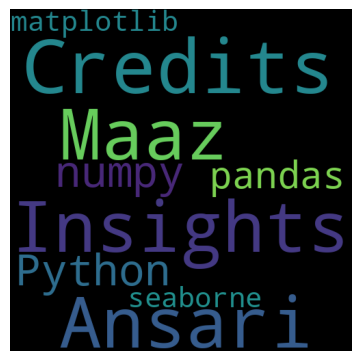

In [238]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
wordcloud_text = WordCloud(width = 500, height = 500).generate(
    "Credits, Insights, Maaz Ansari, Python, numpy,pandas,matplotlib, seaborne")
plt.imshow(wordcloud_text)
plt.axis("off")
plt.show()